# 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 필요 라이브러리 불러오기

In [ ]:
# konlpy 설치, 나눔 폰트 설치
!pip install konlpy
!sudo apt-get install -y fonts-nanum* -qq
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     |████████████████████████████████| 19.4MB 46.6MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 450kB 43.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from konlpy.tag import Okt, Hannanum, Kkma,Komoran
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
from datetime import datetime as dt
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline 

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
# fm._rebuild()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install folium

In [ ]:
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 안깨지게
plt.rcParams['font.family'] = 'NanumGothic'
# font 크기 조절
plt.rcParams['font.size'] = 15
# figsize 를 전역으로 설정
plt.rcParams['figure.figsize'] = (15, 9)  

In [ ]:
# 수지님 데이터 불러오는 부분
sj_path = '/content/drive/MyDrive/AniHelp_feat4.csv'
df = pd.read_csv(sj_path, index_col=0)
df.head()

,공고번호,축종,품종,털색,성별,중성화여부,특징,접수일시,구조사유,발생장소,공고기간,관할보호센터명,보호장소,관할기관,상태,gender,neutering,털색2,품종2,지역,성격,건강,나이
0,광주-남구-2018-00001,개,믹스견,흰색,수컷,미상,"18-0002콩지,다리부상",2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(안락사),1,2,흰색,믹스견,광주 남구,0,2,0
1,광주-남구-2018-00002,개,믹스견,흰색,암컷,미상,18-0003콩이,2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(입양),0,2,흰색,믹스견,광주 남구,0,0,0
2,광주-광산-2018-00001,개,보스턴 테리어,검흰,수컷,아니오,"18-0001볼타,스파이크 목줄착용",2018-01-01,NaN,광산구 하남동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 광산구,종료(자연사),1,1,unknown,품종견,광주 광산,0,0,0
3,경기-수원-2018-00001,개,믹스견,갈색,암컷,아니오,"교통사고 = 골반 / 척추 분리 골절 , 대퇴골두 골절 = 진통제 처치",2018-01-01,NaN,세류사거리,7,광교산동물병원,경기도 수원시 장안구 영화동 127-39,경기도 수원시,종료(안락사),0,1,갈색,믹스견,경기 수원,0,2,0
4,경기-성남-2018-00001,개,푸들,흑색,수컷,아니오,연두색옷착용.귀염증,2018-01-01,유기견발견후 신고,중원도서관근처,10,펫토피아동물병원,"경기도 성남시 분당구 불정로 266 (수내동, 유신제일조합)",경기도 성남시,종료(반환),1,1,검정색,품종견,경기 성남,0,2,0


In [ ]:
# 정희 데이터 불러오는 부분
jeonghee_path = '/content/drive/MyDrive/TwoPs/AniHelp_feat4.csv'
df = pd.read_csv(jeonghee_path, index_col=0)
df.head()

,공고번호,축종,품종,털색,성별,중성화여부,특징,접수일시,구조사유,발생장소,공고기간,관할보호센터명,보호장소,관할기관,상태,gender,neutering,털색2,품종2,지역,성격,건강,나이
0,광주-남구-2018-00001,개,믹스견,흰색,수컷,미상,"18-0002콩지,다리부상",2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(안락사),1,2,흰색,믹스견,광주 남구,0,2,0
1,광주-남구-2018-00002,개,믹스견,흰색,암컷,미상,18-0003콩이,2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(입양),0,2,흰색,믹스견,광주 남구,0,0,0
2,광주-광산-2018-00001,개,보스턴 테리어,검흰,수컷,아니오,"18-0001볼타,스파이크 목줄착용",2018-01-01,NaN,광산구 하남동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 광산구,종료(자연사),1,1,unknown,품종견,광주 광산,0,0,0
3,경기-수원-2018-00001,개,믹스견,갈색,암컷,아니오,"교통사고 = 골반 / 척추 분리 골절 , 대퇴골두 골절 = 진통제 처치",2018-01-01,NaN,세류사거리,7,광교산동물병원,경기도 수원시 장안구 영화동 127-39,경기도 수원시,종료(안락사),0,1,갈색,믹스견,경기 수원,0,2,0
4,경기-성남-2018-00001,개,푸들,흑색,수컷,아니오,연두색옷착용.귀염증,2018-01-01,유기견발견후 신고,중원도서관근처,10,펫토피아동물병원,"경기도 성남시 분당구 불정로 266 (수내동, 유신제일조합)",경기도 성남시,종료(반환),1,1,검정색,품종견,경기 성남,0,2,0


#1차 가설

1. 축종 : 개/고양이 3:1
  - 개가 높나 고양이가 높나(입양률 비교)

1. 품종 : 믹스/품종믹스/품종
  - 개는.. 믹스?쪽이 높지 않을깡 '-')?
  - 고양이는 품종묘가 입양률이 더 높을것
1. 성별 : 암/수/모름
  - 품종에 한해서 암컷 비율이 높을 것
  - 믹스/품종믹스는 상관없을 것 같은데
1. 중성화여부: y/n/모름
  - 크게 영향 안미칠 것 같
1. 털색 : (주관식)
  - 흰색이 높을 것 같고, 그 외에는 특이한 무늬가 높을 것(달마시안)
1. 연도별 : 입양여부
  - 연도별 in/out되는 축종 비교 해보면 고양이의 in이 많아질 것. 
  - 소가족 비율, 자취생 비율, 
  - 사회구조 변화 등 집에서 활동률 높아짐. (2020-21)
  - 평균 공고 기간의 변화
1. 지역 
  - 지역별 in/out되는 숫자. 
  - 지역에 따른 품종 비교 : 수도권(서울/경인권)쪽이 품종(견/묘)의 income이 많을 것
  - 지역별 공고 기간 비교
1. 특징 : 성격/건강/나이
  - 성격: 사람 친화적인 아이들이 잘 나갈 것
  - 건강: 큰 질병이 없는 아이들
  - 나이: (고양이)어릴 수록 잘 나갈 거라 생각됨, 
1. 공고기간 
  - 7.10.12.14 정도로 값이 있던데, 길수록 (공고기간 지나서도 보호중인 아이들도 있음) 입양률 높아질 것 >> 
 

In [ ]:
def ibyang(data): 
    if isinstance(data, str):
        if (data == '종료(안락사)') or (data == '종료(자연사)') or (data == '종료(방사)'): 
            return '종료'
        elif (data == '종료(입양)') or (data == '종료(반환)') or (data == '종료(기증)'): 
            return '입양'
        else: return '공고중'
    else: return 0

ibyang_lst=[]
for i in df['상태'].values:
    ibyang_lst.append(ibyang(i))
            
df['입양여부'] = ibyang_lst

def ibyang2(data): 
    if isinstance(data, str):
        if (data == '종료(안락사)') or (data == '종료(자연사)') or (data == '종료(방사)') or (data == '공고중') or (data == '보호중'): 
            return '미입양'
        else: 
            return '입양'
    else: return 0

ibyang_lst2=[]
for i in df['상태'].values:
    ibyang_lst2.append(ibyang2(i))
            
df['입양여부2'] = ibyang_lst2

#### 1. 축종 : 개/고양이 3:1
- 개가 높나 고양이가 높나(입양률 비교)


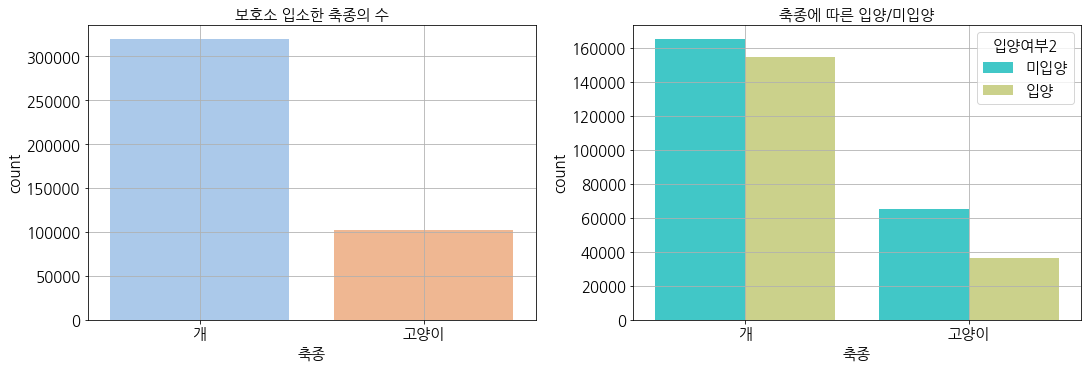

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5), constrained_layout=True)
# plt.figure(figsize=(10,25))

sns.countplot(x='축종', data=df, ax=ax[0],palette='pastel')
sns.countplot(x='축종', data=df, hue="입양여부2", ax=ax[1],palette='rainbow')

ax[0].set_title('보호소 입소한 축종의 수', fontsize = 15)
ax[1].set_title('축종에 따른 입양/미입양', fontsize = 15)
ax[0].grid(True)
ax[1].grid(True)

# ax[1].text(0.75, 66500, '65509')
# ax[1].text(1.15, 37500, '36442')

In [ ]:
df_temp = pd.DataFrame({
    '축종' : ['개', '고양이'],
    '전체 개체수' : [len(df[df['축종']=='개']), len(df[df['축종']=='고양이'])],
    '입양 수' : [len(df[df['축종']=='개'][df['입양여부2']=='입양']) , len(df[df['축종']=='고양이'][df['입양여부2']=='입양'])],
    '입양률' : [len(df[(df['축종']=='개') &( df['입양여부2']=='입양')]) / len(df[df['축종']=='개']) *100, len(df[(df['축종']=='고양이') &( df['입양여부2']=='입양')]) / len(df[df['축종']=='고양이']) *100]
}, index=["A","B"])
df_temp = df_temp.set_index('축종')
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,전체 개체수,입양 수,입양률
축종,,,
개,319810,154442,48.291798
고양이,101951,36442,35.744622


In [ ]:
# 컬럼 이름 바꾸기
df_breed_ibyang = df.groupby(['축종', '입양여부2']).agg({'공고번호':['count']}).rename(columns = {'공고번호' : '입양 수'})
df_breed_ibyang.columns=['count']
df_breed_ibyang

count
축종  입양여부2        
개   미입양    165368
    입양     154442
고양이 미입양     65509
    입양      36442

In [ ]:
df_temp = pd.DataFrame({
    '축종' : ['개', '고양이'],
    '전체 개체수' : [len(df[df['축종']=='개']), len(df[df['축종']=='고양이'])],
    '입양 수' : [len(df[df['축종']=='개'][df['입양여부2']=='입양']) , len(df[df['축종']=='고양이'][df['입양여부2']=='입양'])],
    '입양률' : [len(df[(df['축종']=='개') &( df['입양여부2']=='입양')]) / len(df[df['축종']=='개']) *100, len(df[(df['축종']=='고양이') &( df['입양여부2']=='입양')]) / len(df[df['축종']=='고양이']) *100]
}, index=["A","B"])
df_temp = df_temp.set_index('축종')
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,전체 개체수,입양 수,입양률
축종,,,
개,319810,154442,48.291798
고양이,101951,36442,35.744622


Text(1.1, 10000, '35.74%')

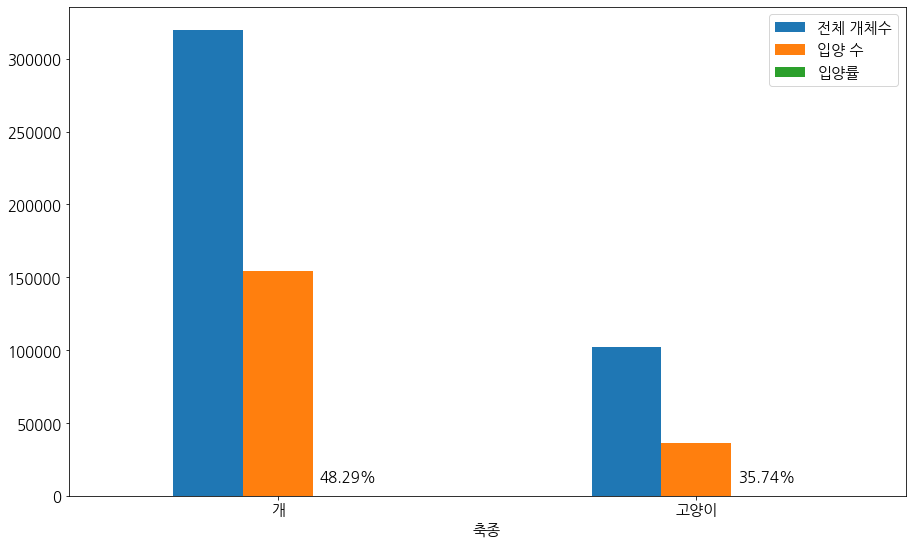

In [ ]:

df_temp.plot(kind='bar',rot=0) #  color='#e35f62',
plt.plot()
plt.text(0.1, 10000, '48.29%')
plt.text(1.1, 10000, '35.74%')

# TODO - x 라벨값 회전


#### 2. 품종 : 믹스/품종믹스/품종
개는.. 믹스?쪽이 높지 않을깡 '-')?
고양이는 품종묘가 입양률이 더 높을것



In [ ]:
df_c_1 = df.groupby(['축종', '품종2']).agg({'품종':['count']})
df_c_1.columns=['마리수']
df_c_1['입양'] = df.groupby(['축종', '품종2']).apply(lambda d: len(d[d['입양여부2'] == '입양']))
df_c_1 = df_c_1.reindex([
    ['개','개','개','고양이','고양이','고양이'],
    ['믹스견','품종견','품종 믹스견','한국 고양이','품종묘','품종 믹스묘']   
])
df_c_1['입양률'] = df.groupby(['축종', '품종2']).apply(lambda a: (len(a[a['입양여부2'] == '입양']) / len(a[{'품종':['count']}]) ) *100 )
df_c_1

# TODO - 

마리수     입양        입양률
축종  품종2                             
개   믹스견     214553  75321  35.105357
    품종견     104503  78750  75.356688
    품종 믹스견     750    371  49.466667
고양이 한국 고양이   91622  31109  33.517573
    품종묘       7684   4757  61.907860
    품종 믹스묘    1453    576  39.642120

<bound method Axes.set_ylabel of <matplotlib.axes._subplots.AxesSubplot object at 0x7f770814e2d0>>

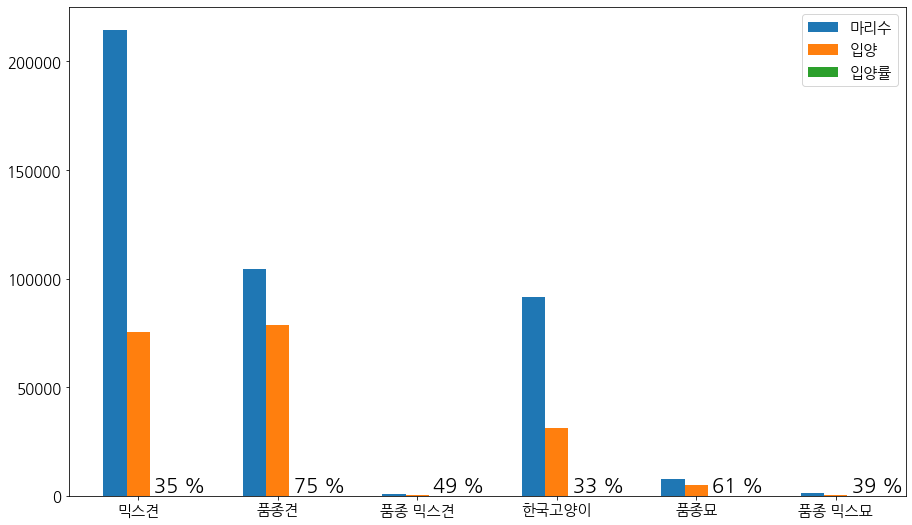

In [ ]:
# plt.text(0.1, 10000, '48.29%')
# plt.text(1.1, 10000, '35.74%')


aa = df_c_1.reset_index().drop('축종',axis=1)
aa = aa.rename(index = {'품종': 'new_nm'})
aa

fig,ax = plt.subplots(1,1)
aa.plot(kind='bar',rot=0, ax = ax)
for i in range(len(aa)):
    plt.text(i+0.3, aa.iloc[i,3], str(int(aa.iloc[i,3])) + " %",                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 20, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
ax.set_xticklabels(['믹스견','품종견','품종 믹스견','한국고양이','품종묘','품종 믹스묘'])
ax.set_ylabel
# TODO - x 값 라벨링(품종2,랑 회전 + 입양률 숫자로 표기)

In [ ]:
# 품종별 축종의 입양률 비교

# df_c_2 = df.groupby(['품종2','축종'])
# df_c_2.size()
# df_c_2 = df.groupby(['품종2','축종']).agg({'축종':['count']}).rename(columns = {'공고번호' : '축종'})
# df_c_2 = df_c_1.reset_index(level=[0,1]).set_index(['품종2','축종'])
# df_c_2 = df_c_2.reindex([
#     ['믹스견','한국 고양이','품종견','품종묘','품종 믹스견','품종 믹스묘'],
#     ['개','고양이','개','고양이','개','고양이']   
# ])
# df_c_2

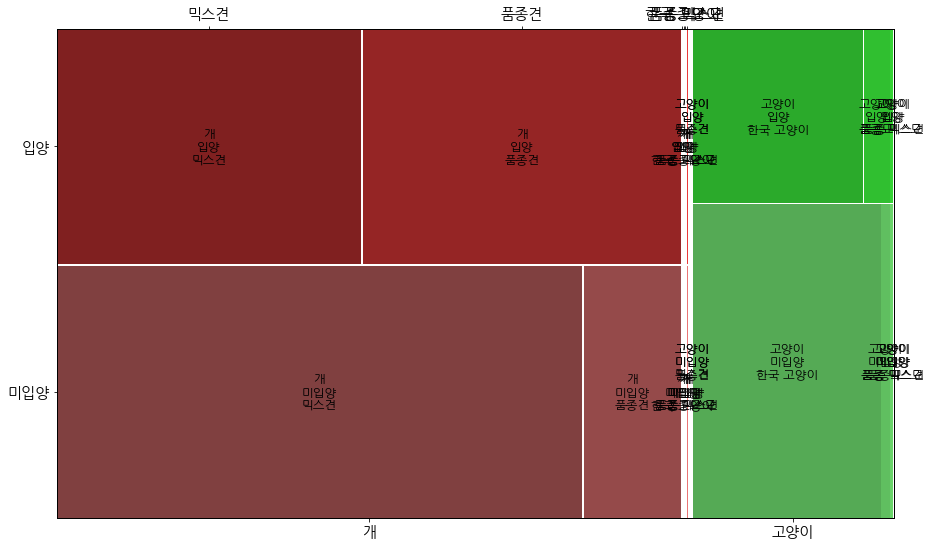

In [ ]:
# 축종별 품종에 따른 입양률

a1 = df[['축종','품종2','입양여부2','성별']]
mosaic(a1, ['축종','입양여부2','품종2'])
plt.show()

#### 3. 성별 : 암/수/모름
품종에 한해서 암컷 비율이 높을 것
믹스/품종믹스는 상관없을 것 같은데


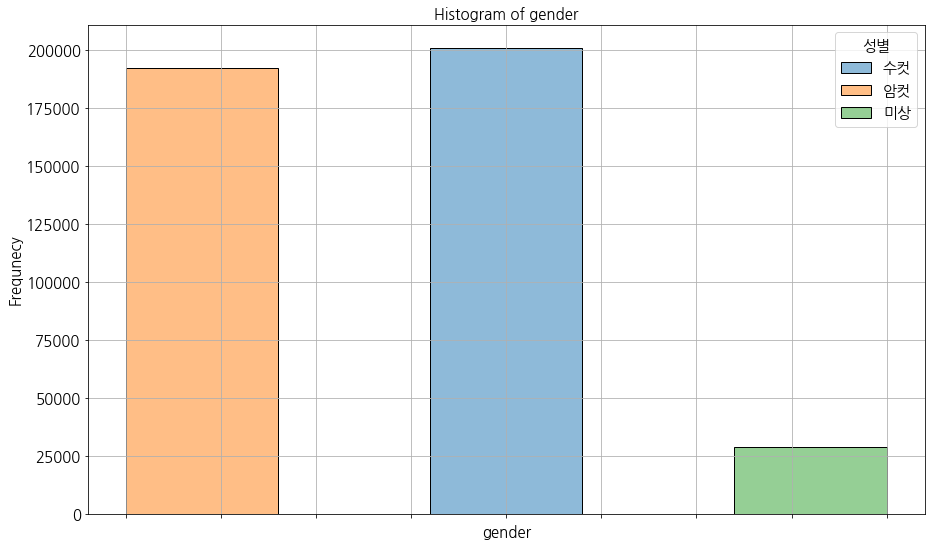

In [ ]:
# 입소한 동물의 성별 
fig,ax = plt.subplots(1,1)
sns.histplot(x = 'gender', data=df, bins=5,hue='성별', ax=ax) # groupby='축종', 
plt.title('Histogram of gender', fontsize = 15)
ax.set_xticklabels([])
plt.xlabel('gender', fontsize = 15)
plt.ylabel('Frequnecy', fontsize = 15)
ax.grid(True)

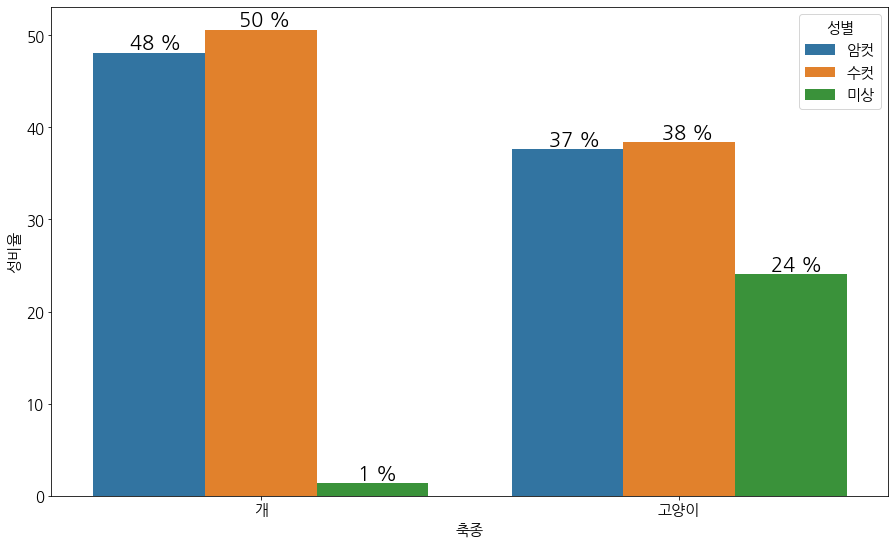

In [ ]:
# 축종별 성비율
df_c_4 = df.groupby(['축종', '성별']).agg({'성별':['count']}).rename(columns = {'공고번호' : 'count'})
df_c_4.columns = ['counts']
df_c_4 = df_c_4.reindex(['암컷','수컷','미상'], level=1)

a = df.groupby('축종').agg({'성별':'count'})
a.columns=['counts']

df_c_4['성비율'] = (df_c_4/a )*100
df_c_4

fig,ax = plt.subplots(1,1)
# TODO -시각화 
# x 값 축종-성별, 해두고 ,bar 위에 비율 숫자 입력
df_c_4 = df_c_4.reset_index()
# df_c_4
sns.barplot(data=df_c_4,x='축종',y='성비율',hue='성별',ax=ax)
x_loc = [-0.25,0.01,0.28,0.75,1.02,1.28]
for i in range(len(df_c_4)):
    ax.text(x_loc[i], df_c_4.iloc[i,3], str(int(df_c_4.iloc[i,3])) + " %",                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 20, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)



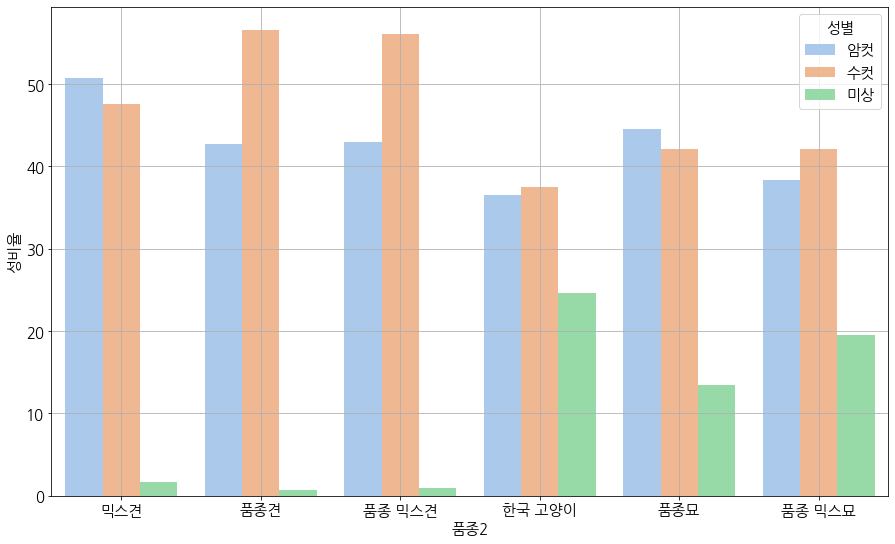

In [ ]:
# 축종/품종별 성비율
df_c_5 = df.groupby(['축종','품종2','성별']).agg({'품종':['count']})  # agg({'기 지정된 column이름 ':['함수이름']})
df_c_5 = df_c_5.reindex(['믹스견','품종견','품종 믹스견',
     '한국 고양이','품종묘','품종 믹스묘'], level=1)
df_c_5 = df_c_5.reindex(['암컷','수컷','미상'], level=2)

df_c_5.columns = ['count']
df_c_5
a = df.groupby(['축종', '품종2']).agg({'성별':'count'})
a.columns=['count']

df_c_5['성비율'] = (df_c_5/a )*100
df_c_5 = df_c_5.reset_index()

# TODO - subplot [1,2]
# 축종별/ 품종별, 성별 비율
fig,ax = plt.subplots(1,1)
sns.barplot(data=df_c_5, x='품종2',y='성비율',hue='성별',ax=ax,palette='pastel')
ax.grid(True)

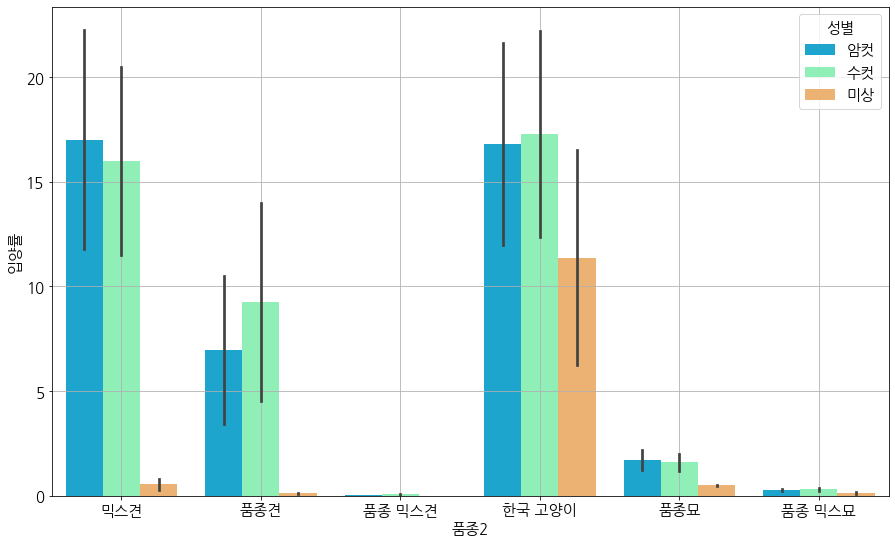

In [ ]:
# 축종/품종/성별 입양률
df_c_6 = df.groupby(['축종','품종2','성별','입양여부2']).agg({'품종':['count']})  
df_c_6.columns=['count']
df_c_6 = df_c_6.reindex(['믹스견','품종견','품종 믹스견','한국 고양이','품종묘','품종 믹스묘'], level=1)
df_c_6 = df_c_6.reindex(['암컷','수컷','미상'], level=2)

df_c_6
a = df.groupby(['축종']).agg({'품종' : 'count'})
a.columns=['count']
df_c_6['입양률'] = (df_c_6/a )*100
df_c_6 = df_c_6.reset_index()
fig,ax = plt.subplots(1,1)
sns.barplot(data=df_c_6, x='품종2',y='입양률',hue='성별',ax=ax,palette='rainbow')
ax.grid(True)
# TODO - 축종/ 품종2/성별의 입양률


#### 4. 중성화여부: y/n/모름
크게 영향 안미칠 것 같

In [ ]:
# 축종, 중성화
df_c_7 = df.groupby(['축종','neutering'])
df_c_7.size()

df_c_7 = df.groupby(['축종','neutering']).agg({'품종':['count']}) 
df_c_7.columns=['count']
df_c_7

count
축종  neutering        
개   0           16529
    1          205890
    2           97387
고양이 0            2336
    1           69173
    2           29250

In [ ]:
# 축종, 성별, 중성화
df_c_8 = df.groupby(['축종','성별','neutering'])

df_c_8 = df.groupby(['축종','성별','neutering']).agg({'품종':['count']})  # agg({'기 지정된 column이름 ':['함수이름']})
df_c_8.columns=['count']
df_c_8

count
축종  성별 neutering        
개   미상 0              15
       1            1682
       2            2625
    수컷 0           15607
       1          111715
       2           34406
    암컷 0             907
       1           92493
       2           60356
고양이 미상 0              94
       1           13072
       2           11046
    수컷 0            1751
       1           30350
       2            6576
    암컷 0             491
       1           25751
       2           11628

In [ ]:
# 축종, 품종, 중성화
df_c_9 = df.groupby(['축종','품종2','neutering'])

df_c_9 = df.groupby(['축종','품종2','neutering']).agg({'품종':['count']})  # agg({'기 지정된 column이름 ':['함수이름']})
df_c_9.columns=['count']
df_c_9

count
축종  품종2    neutering        
개   믹스견    0            2548
           1          149817
           2           62188
    품종 믹스견 0              38
           1             499
           2             213
    품종견    0           13943
           1           55574
           2           34986
고양이 품종 믹스묘 0              57
           1            1064
           2             332
    품종묘    0             744
           1            4319
           2            2621
    한국 고양이 0            1535
           1           63790
           2           26297

In [ ]:
# 축종, 성별, 품종, 중성화
df_c_10 = df.groupby(['축종','품종2','성별','neutering'])

df_c_10 = df.groupby(['축종','품종2','성별','neutering']).agg({'품종':['count']})  # agg({'기 지정된 column이름 ':['함수이름']})
df_c_10.columns=['count']
df_c_10

count
축종  품종2    성별 neutering       
개   믹스견    미상 0              1
              1           1496
              2           2061
           수컷 0           2131
              1          77032
              2          23013
           암컷 0            416
              1          71289
              2          37114
    품종 믹스견 미상 1              1
              2              6
           수컷 0             37
              1            341
              2             43
           암컷 0              1
              1            157
              2            164
    품종견    미상 0             14
              1            185
              2            558
           수컷 0          13439
              1          34342
              2          11350
           암컷 0            490
              1          21047
              2          23078
고양이 품종 믹스묘 미상 0              1
              1            226
              2             56
           수컷 0             44
              1            456
              2            112
           암컷 0             12
              1            382
              2            164
    품종묘    미상 0              7
              1            317
              2            707
           수컷 0            649
              1           2176
              2            407
           암컷 0             88
              1           1826
              2           1507
    한국 고양이 미상 0             86
              1          12529
              2          10283
           수컷 0           1058
              1          27718
              2           6057
           암컷 0            391
              1          23543
              2           9957

In [ ]:
# 축종, 성별, 품종, 중성화, 입양률
df_c_11 = df.groupby(['축종','품종2','성별','neutering','입양여부2']).agg({'품종':['count']})  # agg({'기 지정된 column이름 ':['함수이름']})
df_c_11.columns=['count']

a = df.groupby(['축종','품종2','성별','neutering']).agg({'품종' : 'count'})
a.columns=['count']


df_c_11['입양률'] = (df_c_11/a)*100
df_c_11

count         입양률
축종  품종2    성별 neutering 입양여부2                   
개   믹스견    미상 0         미입양        1  100.000000
              1         미입양     1107   73.997326
                        입양       389   26.002674
              2         미입양     1508   73.168365
                        입양       553   26.831635
...                              ...         ...
고양이 한국 고양이 암컷 0         입양       126   32.225064
              1         미입양    14146   60.085800
                        입양      9397   39.914200
              2         미입양     7390   74.219142
                        입양      2567   25.780858

[101 rows x 2 columns]

## 5. 털색 비율

In [ ]:
# 5. 털색 비율
fur_ratio = {
    
}

for i in df['털색2']:
    if isinstance(i, str):
        if i not in fur_ratio.keys():
            fur_ratio[i] = 1
        else:
            fur_ratio[i] += 1
    else: 
        math.isnan(i)
        print('nan 값 발견')
    

fur_ratio = sorted(fur_ratio.items(), key= lambda x : x[1],reverse=True)    

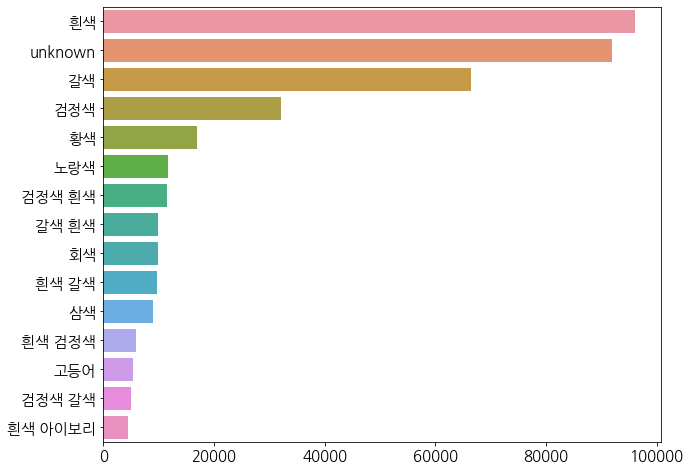

In [ ]:
# 털색의 비율이 대부분 한 쪽으로 쏠려 있어 탑 30만보고 비교
plt.figure(figsize=(10,8))

data = fur_ratio[:15]
x = list(map(lambda x:x[1],data))
y = list(map(lambda x:x[0],data))

sns.barplot(x=x,y=y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


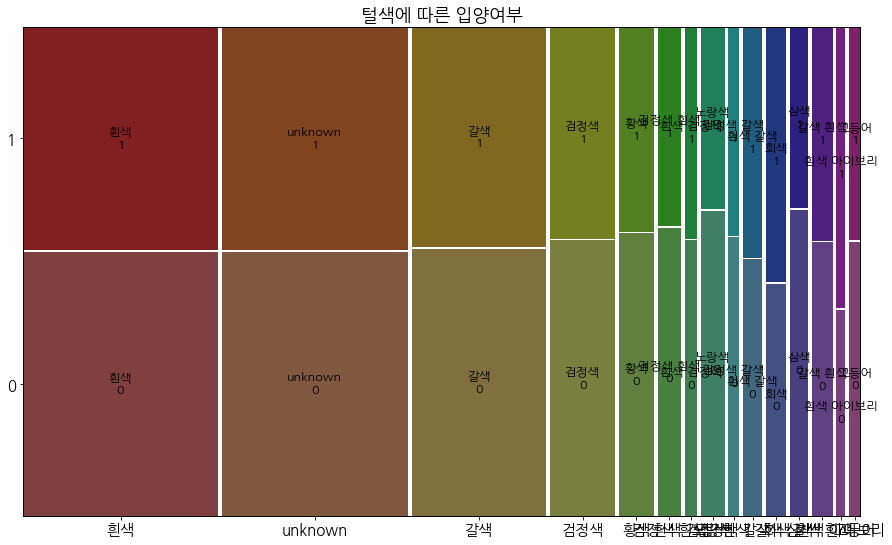

In [ ]:
out_arr = ['종료(입양)','종료(기증)','종료(반환)']
color_top = y.copy()
# out_arr = ['종료(입양)','종료(기증)'] # 반환 여부에 따라 나이에 따른 입양률이 달라짐
color_df = df[['털색2','상태']]
def divide_status(df):
  arr = []
  for t in df['상태']:
    if t in out_arr:
      arr.append(1)
    else:
      arr.append(0)
  return arr
def divide_color(df):
  arr = []
  for t in df['털색2']:
    if t in color_top:
      arr.append(True)
    else:
      arr.append(False)
  return arr

color_df['입양여부'] = divide_status(color_df)

mosaic(color_df[divide_color(color_df)], ['털색2','입양여부'], 
 title='털색에 따른 입양여부')
plt.show()

## 6. 연도별 in/out

#### 새 주인에게 입양되는 케이스
#### 1. 연도별 축종별 in/out 수

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


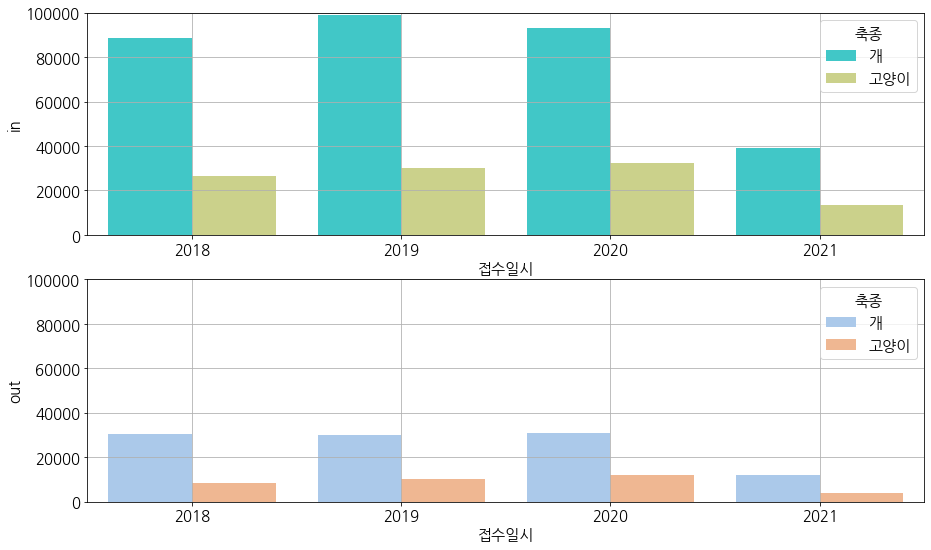

In [ ]:
out_arr = ['종료(입양)','종료(기증)'] # 새로운 주인에게로 입양되는 케이스
# 입양 되는 경우에만 'out' 그외에는 nan을 주어서 count시 'out'만 세도록 함
temp_df = df['상태'].apply(lambda x : 'out' if x in out_arr else np.nan)
temp_df
# 컬럼 추가
temp_df = df[['접수일시','축종','상태']]
temp_df['out'] = df['상태'].apply(lambda x : 'out' if x in out_arr else np.nan)
temp_df
# 접수일시 축종 그룹에 따른 전체 개수 및 out 개수
temp_df = temp_df.groupby([temp_df['접수일시']\
            .apply(lambda x : str(x)[:4]),'축종'])\
            .agg({'상태':['count'],
                  'out':['count']})
temp_df

temp_df.columns = ['in','out']
temp_df = temp_df.reset_index(level=[0,1]) 
temp_df

fig,ax = plt.subplots(2,1)  # plt.subplots() 편의 함수는 Figure 객체를 생성하고 Figure.subplots()를 호출하여 리턴
sns.barplot(data=temp_df,x='접수일시',y='in',hue='축종',ax=ax[0],palette='rainbow')
sns.barplot(data=temp_df,x='접수일시',y='out',hue='축종',ax=ax[1],palette='pastel')
ax[0].set_ylim(0,100000) # y축 표시 범위
ax[1].set_ylim(0,100000)
ax[0].grid(True) # 그리드 그리기
ax[1].grid(True)
plt.show()

#### 2. 연도별 축종별 입양률

In [ ]:
temp_df = df.groupby([df['접수일시']\
            .apply(lambda x : str(x)[:4]),'축종','상태'])\
            .agg({'품종':['count']})
temp_df


품종
                  count
접수일시 축종  상태            
2018 개   보호중        405
         종료(기증)    1810
         종료(미포획)    486
         종료(반환)   14855
         종료(방사)      26
...                 ...
2021 고양이 종료(반환)     185
         종료(방사)     397
         종료(안락사)    386
         종료(입양)    4005
         종료(자연사)   5144

[62 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


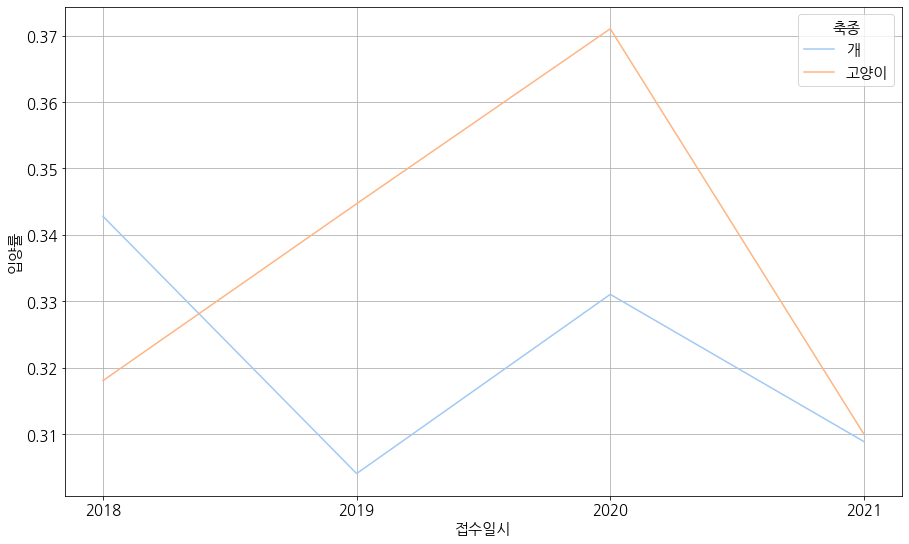

In [ ]:
# 연도별 in/out
temp_df = df.groupby([df['접수일시']\
            .apply(lambda x : str(x)[:4]),'축종','상태'])\
            .agg({'품종':['count']})

result_df = temp_df / temp_df.groupby(['접수일시','축종']).agg('sum')
result_df = result_df.reset_index(level=[0,1,2])
result_df

result_df = result_df[result_df['상태'].apply(lambda x: True if x in out_arr else False)]
result_df=result_df.groupby(['접수일시','축종']).sum().reset_index(level=[0,1])
result_df

dog_df = result_df[result_df['축종']=='개']
dog_df = dog_df.reset_index(level=0)
cat_df = result_df[result_df['축종']=='고양이']
cat_df = cat_df.reset_index(level=0)

fig,ax = plt.subplots()  # plt.subplots() 편의 함수는 Figure 객체를 생성하고 Figure.subplots()를 호출하여 리턴
sns.lineplot(data=result_df,x='접수일시',y=('품종','count'),ax=ax,hue='축종',palette=sns.palettes.color_palette('pastel',2))
ax.set_ylabel('입양률')
ax.grid(True)
plt.show()


#### 본래 주인에게 돌아가는 케이스

#### 1. 연도별 축종별 in/out 수

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


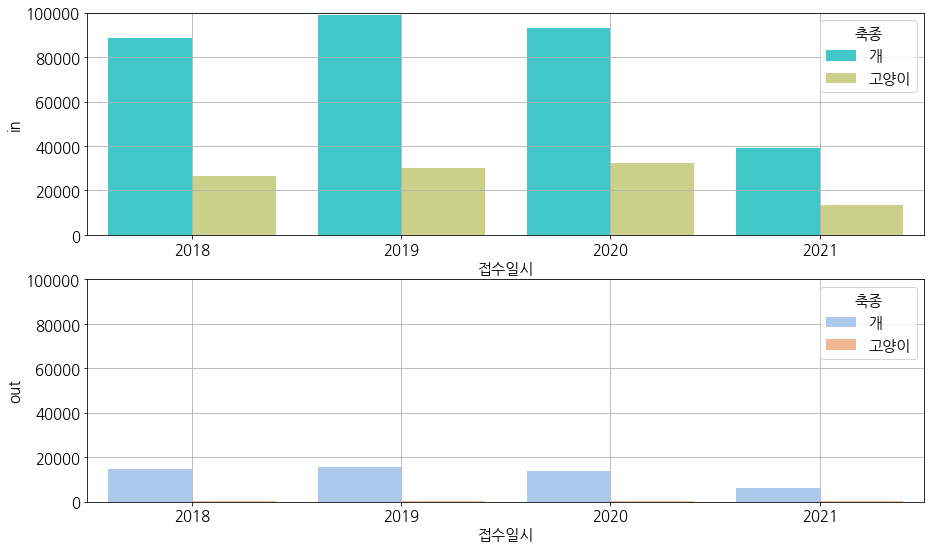

In [ ]:
out_arr = ['종료(반환)'] # 본래 주인에게로 되돌아가는 케이스

temp_df = df['상태'].apply(lambda x : 'out' if x in out_arr else np.nan)
temp_df

temp_df = df[['접수일시','축종','상태']]
temp_df['out'] = df['상태'].apply(lambda x : 'out' if x in out_arr else np.nan)
temp_df

temp_df = temp_df.groupby([temp_df['접수일시']\
            .apply(lambda x : str(x)[:4]),'축종'])\
            .agg({'상태':['count'],
                  'out':['count']})
temp_df

temp_df.columns = ['in','out']
temp_df = temp_df.reset_index(level=[0,1])
temp_df

fig,ax = plt.subplots(2,1)  # plt.subplots() 편의 함수는 Figure 객체를 생성하고 Figure.subplots()를 호출하여 리턴
sns.barplot(data=temp_df,x='접수일시',y='in',hue='축종',ax=ax[0],palette='rainbow')
sns.barplot(data=temp_df,x='접수일시',y='out',hue='축종',ax=ax[1],palette='pastel')
ax[0].set_ylim(0,100000)
ax[1].set_ylim(0,100000)
ax[0].grid(True)
ax[1].grid(True)
plt.show()

#### 2. 연도별 축종별 입양률

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


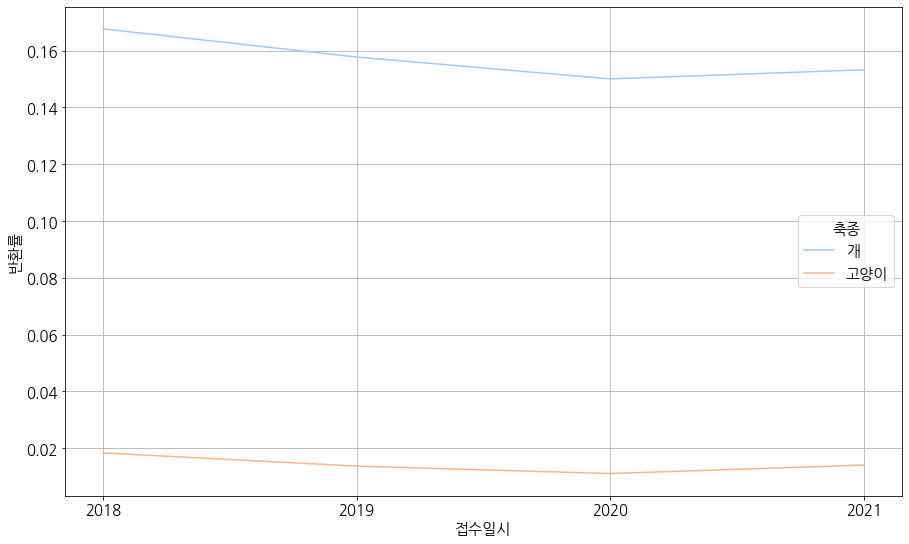

In [ ]:
# 연도별 in/out
temp_df = df.groupby([df['접수일시']\
            .apply(lambda x : str(x)[:4]),'축종','상태'])\
            .agg({'품종':['count']})

result_df = temp_df / temp_df.groupby(['접수일시','축종']).agg('sum')
result_df = result_df.reset_index(level=[0,1,2])
result_df

result_df = result_df[result_df['상태'].apply(lambda x: True if x in out_arr else False)]
result_df=result_df.groupby(['접수일시','축종']).sum().reset_index(level=[0,1])
result_df

dog_df = result_df[result_df['축종']=='개']
dog_df = dog_df.reset_index(level=0)
cat_df = result_df[result_df['축종']=='고양이']
cat_df = cat_df.reset_index(level=0)

fig,ax = plt.subplots()  # plt.subplots() 편의 함수는 Figure 객체를 생성하고 Figure.subplots()를 호출하여 리턴
sns.lineplot(data=result_df,x='접수일시',y=('품종','count'),ax=ax,hue='축종',palette=sns.palettes.color_palette('pastel',2))
ax.set_ylabel('반환률')
ax.grid(True)
plt.show()

11. 




In [ ]:
# 수지님 데이터 불러오는 부분
# sj_path22 = '/content/drive/MyDrive/AniHelp_feat6.csv'
sj_path22 = '/content/drive/MyDrive/AniHelp_feat6.csv'
df_feat6 = pd.read_csv(sj_path22, index_col=0)
# df_feat6 = df_feat6.drop('Unnamed: 0', axis=1)
df_feat6 = df_feat6.drop('index', axis=1)
df_feat6.head()

,공고번호,축종,품종,털색,성별,중성화여부,특징,접수일시,구조사유,발생장소,공고기간,관할보호센터명,보호장소,관할기관,상태,gender,neutering,털색2,품종2,지역,성격,건강,나이,입양여부,입양여부2,월,도,시,위도,경도
0,광주-남구-2018-00001,개,믹스견,흰색,수컷,미상,"18-0002콩지,다리부상",2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(안락사),1,2,흰색,믹스견,광주 남구,0,2,0,0,0,1,광주,남구,35.222932,126.881636
1,광주-남구-2018-00002,개,믹스견,흰색,암컷,미상,18-0003콩이,2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(입양),0,2,흰색,믹스견,광주 남구,0,0,0,1,1,1,광주,남구,35.222932,126.881636
2,광주-광산-2018-00001,개,보스턴 테리어,검흰,수컷,아니오,"18-0001볼타,스파이크 목줄착용",2018-01-01,NaN,광산구 하남동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 광산구,종료(자연사),1,1,unknown,품종견,광주 광산,0,0,0,0,0,1,광주,광산,35.222932,126.881636
3,경기-수원-2018-00001,개,믹스견,갈색,암컷,아니오,"교통사고 = 골반 / 척추 분리 골절 , 대퇴골두 골절 = 진통제 처치",2018-01-01,NaN,세류사거리,7,광교산동물병원,경기도 수원시 장안구 영화동 127-39,경기도 수원시,종료(안락사),0,1,갈색,믹스견,경기 수원,0,2,0,0,0,1,경기,수원,37.290757,127.016914
4,경기-성남-2018-00001,개,푸들,흑색,수컷,아니오,연두색옷착용.귀염증,2018-01-01,유기견발견후 신고,중원도서관근처,10,펫토피아동물병원,"경기도 성남시 분당구 불정로 266 (수내동, 유신제일조합)",경기도 성남시,종료(반환),1,1,검정색,품종견,경기 성남,0,2,0,1,1,1,경기,성남,37.367098,127.127694


In [ ]:
def split_year(df_feat6):
  arr= []
  for i in df_feat6['접수일시']:
    arr.append(int(i[0:4]))
  return arr

def split_mon(df_feat6):
  arr= []
  for i in df_feat6['접수일시']:
    arr.append(int(i[5:7]))
  return arr

def split_yr_mnth(df_feat6):
  arr= []
  for i in df_feat6['접수일시']:
    arr.append(str(i[0:7]))
  return arr

df_feat6['연'] = split_year(df_feat6)
df_feat6['월'] = split_mon(df_feat6)
df_feat6['연월'] = split_yr_mnth(df_feat6)
df_feat6.head()

,공고번호,축종,품종,털색,성별,중성화여부,특징,접수일시,구조사유,발생장소,공고기간,관할보호센터명,보호장소,관할기관,상태,gender,neutering,털색2,품종2,지역,성격,건강,나이,입양여부,입양여부2,월,도,시,위도,경도,연,연월
0,광주-남구-2018-00001,개,믹스견,흰색,수컷,미상,"18-0002콩지,다리부상",2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(안락사),1,2,흰색,믹스견,광주 남구,0,2,0,0,0,1,광주,남구,35.222932,126.881636,2018,2018-01
1,광주-남구-2018-00002,개,믹스견,흰색,암컷,미상,18-0003콩이,2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(입양),0,2,흰색,믹스견,광주 남구,0,0,0,1,1,1,광주,남구,35.222932,126.881636,2018,2018-01
2,광주-광산-2018-00001,개,보스턴 테리어,검흰,수컷,아니오,"18-0001볼타,스파이크 목줄착용",2018-01-01,NaN,광산구 하남동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 광산구,종료(자연사),1,1,unknown,품종견,광주 광산,0,0,0,0,0,1,광주,광산,35.222932,126.881636,2018,2018-01
3,경기-수원-2018-00001,개,믹스견,갈색,암컷,아니오,"교통사고 = 골반 / 척추 분리 골절 , 대퇴골두 골절 = 진통제 처치",2018-01-01,NaN,세류사거리,7,광교산동물병원,경기도 수원시 장안구 영화동 127-39,경기도 수원시,종료(안락사),0,1,갈색,믹스견,경기 수원,0,2,0,0,0,1,경기,수원,37.290757,127.016914,2018,2018-01
4,경기-성남-2018-00001,개,푸들,흑색,수컷,아니오,연두색옷착용.귀염증,2018-01-01,유기견발견후 신고,중원도서관근처,10,펫토피아동물병원,"경기도 성남시 분당구 불정로 266 (수내동, 유신제일조합)",경기도 성남시,종료(반환),1,1,검정색,품종견,경기 성남,0,2,0,1,1,1,경기,성남,37.367098,127.127694,2018,2018-01


In [ ]:
def split_year(df_feat6):
  arr= []
  for i in df_feat6['접수일시']:
    arr.append(int(i[0:4]))
  return arr

def split_mon(df_feat6):
  arr= []
  for i in df_feat6['접수일시']:
    arr.append(int(i[5:7]))
  return arr

def split_yr_mnth(df_feat6):
  arr= []
  for i in df_feat6['접수일시']:
    arr.append(str(i[0:7]))
  return arr

df_feat6['연'] = split_year(df_feat6)
df_feat6['월'] = split_mon(df_feat6)
df_feat6['연월'] = split_yr_mnth(df_feat6)
df_feat6.head()

,공고번호,축종,품종,털색,성별,중성화여부,특징,접수일시,구조사유,발생장소,공고기간,관할보호센터명,보호장소,관할기관,상태,gender,neutering,털색2,품종2,지역,성격,건강,나이,입양여부,입양여부2,월,도,시,위도,경도,연,연월
0,광주-남구-2018-00001,개,믹스견,흰색,수컷,미상,"18-0002콩지,다리부상",2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(안락사),1,2,흰색,믹스견,광주 남구,0,2,0,0,0,1,광주,남구,35.222932,126.881636,2018,2018-01
1,광주-남구-2018-00002,개,믹스견,흰색,암컷,미상,18-0003콩이,2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(입양),0,2,흰색,믹스견,광주 남구,0,0,0,1,1,1,광주,남구,35.222932,126.881636,2018,2018-01
2,광주-광산-2018-00001,개,보스턴 테리어,검흰,수컷,아니오,"18-0001볼타,스파이크 목줄착용",2018-01-01,NaN,광산구 하남동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 광산구,종료(자연사),1,1,unknown,품종견,광주 광산,0,0,0,0,0,1,광주,광산,35.222932,126.881636,2018,2018-01
3,경기-수원-2018-00001,개,믹스견,갈색,암컷,아니오,"교통사고 = 골반 / 척추 분리 골절 , 대퇴골두 골절 = 진통제 처치",2018-01-01,NaN,세류사거리,7,광교산동물병원,경기도 수원시 장안구 영화동 127-39,경기도 수원시,종료(안락사),0,1,갈색,믹스견,경기 수원,0,2,0,0,0,1,경기,수원,37.290757,127.016914,2018,2018-01
4,경기-성남-2018-00001,개,푸들,흑색,수컷,아니오,연두색옷착용.귀염증,2018-01-01,유기견발견후 신고,중원도서관근처,10,펫토피아동물병원,"경기도 성남시 분당구 불정로 266 (수내동, 유신제일조합)",경기도 성남시,종료(반환),1,1,검정색,품종견,경기 성남,0,2,0,1,1,1,경기,성남,37.367098,127.127694,2018,2018-01


In [ ]:
# 매년 도별 입소한 아이들 수

a_test_in = df_feat6.groupby(['도','연']).agg({'시':['count']}).rename(columns = {'시' : '도시'})
a_test_in = a_test_in.unstack(level = 0) 
#.sort_values(by='연', ascending=False)
a_test_in

도시                                  ...                                    
     count                                  ...                                    
도       강원     경기     경남    경북    광주    대구  ...    인천    전남    전북    제주    충남    충북
연                                           ...                                    
2018  5278  25317  11352  6761  3227  4687  ...  6781  5836  5984  6886  6944  3704
2019  6098  27473  14096  8515  3774  5329  ...  6697  7492  7822  7307  8046  4886
2020  5430  26413  13648  9558  3519  4946  ...  6478  8026  8774  6303  8793  4717
2021  2250  10236   5267  3984  1423  1687  ...  2442  3748  3783  2273  3705  1854

[4 rows x 17 columns]

ValueError: ignored

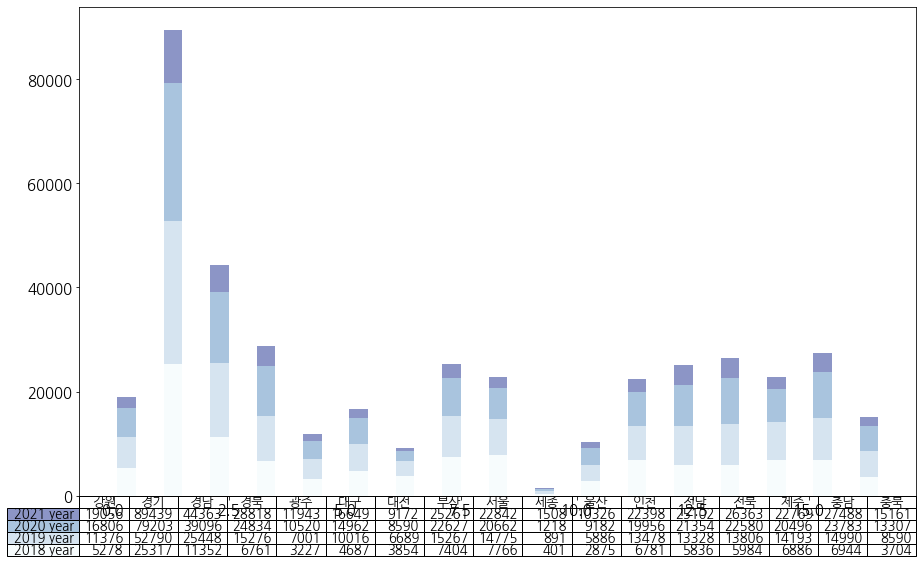

In [ ]:
# 매년 도별 입소한 아이들 수 

# figsize 를 전역으로 설정
plt.rcParams['figure.figsize'] = (15, 9)  
# font 크기 조절
plt.rcParams['font.size'] = 15

data_in = a_test_in.values.tolist()

columns = ('강원', '경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북')
rows = ['%d year' % x for x in (2021,2020,2019,2018)]

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data_in)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data_in[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_in[row]
    cell_text.append(['%d' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=1.2, bottom=1.2, hspace=5.0)

plt.ylabel("Numbers of animals")
plt.yticks(np.arange(len(data_in)),[str(d) for d in data_in])
plt.xticks([])
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
plt.title('Numbers of Animals by Province')
plt.show()

In [ ]:
# 매년 / 도별 입양된 수 

a_test_out = df_feat6[df_feat6['입양여부2']==1][['도','연','시']]
a_test_out = a_test_out.groupby(['도','연']).agg({'시':['count']}).rename(columns = {'시' : '도시'})
a_test_out = a_test_out.unstack(level = 0)
#.sort_values(by='연', ascending=False)
a_test_out

In [ ]:
# 매년 / 도별 입양된 수 

# figsize 를 전역으로 설정
plt.rcParams['figure.figsize'] = (15, 9)  
# font 크기 조절
plt.rcParams['font.size'] = 15

data_out = a_test_out.values.tolist()

columns = ('강원', '경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북')
rows = ['%d year' % x for x in (2021,2020,2019,2018)]

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data_out)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data_out[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_out[row]
    cell_text.append(['%d' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=1.5, bottom=1.5)

plt.ylabel("Numbers of animals")
plt.yticks('%d' % d for d in data_out)
plt.xticks([])
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
plt.title('Numbers of Animals by Province')
plt.show()

In [ ]:
# 매년 입소한 아이들
# rename(columns = {'시' : 'count'})
year_in = df_feat6.groupby(['월','연']).agg({'시':['count']})
year_in.columns=['count']
year_in = year_in.unstack(level = 0)
#.sort_values(by='연', ascending=False)
year_in.fillna(0, inplace=True)
year_in = year_in.astype(int)
year_in

In [ ]:
# 매년 입소한 아이들

# figsize 를 전역으로 설정
plt.rcParams['figure.figsize'] = (15, 9)  
# font 크기 조절
plt.rcParams['font.size'] = 15

data_yr_in = year_in.values.tolist()

columns = (1,2,3,4,5,6,7,8,9,10,11,12)
rows = ['%d year' % x for x in (2021,2020,2019,2018)]

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data_yr_in)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data_yr_in[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_yr_in[row]
    cell_text.append(['%d' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=1.5, bottom=1.5)

plt.ylabel("Numbers of animals")
plt.yticks('%d' % d for d in data_yr_in)
plt.xticks([])
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
plt.title('Numbers of Animals by Province')
plt.show()

In [ ]:
# 매년 입양 된 아이들 

year_out = df_feat6[df_feat6['입양여부2']==1][['월','연','시']]  #입양여부2 = 1. 됨. 0 안됨
year_out = df_feat6.groupby(['월','연']).agg({'시':['count']})
year_out = year_out.unstack(level = 0)
#.sort_values(by='연', ascending=False)
year_out.fillna(0, inplace=True)
year_out = year_out.astype(int)
year_out

In [ ]:
# 매년 입양 된 아이들 

# figsize 를 전역으로 설정
plt.rcParams['figure.figsize'] = (15, 9)  
# font 크기 조절
plt.rcParams['font.size'] = 15

data_yr_out = year_in.values.tolist()

columns = (1,2,3,4,5,6,7,8,9,10,11,12)
rows = ['%d year' % x for x in (2021,2020,2019,2018)]

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data_yr_out)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data_yr_out[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_yr_out[row]
    cell_text.append(['%d' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=1.5, bottom=1.5)

plt.ylabel("Numbers of animals")
plt.yticks('%d' % d for d in data_yr_out)
plt.xticks([])
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
plt.title('Numbers of Animals by Province')
plt.show()

In [ ]:
year_IN = df_feat6.groupby('연').agg({'품종':['count']})
year_IN.columns = ['count']
year_IN = year_IN.reset_index()
year_IN

,연,count
0,2018,114503
1,2019,128488
2,2020,125080
3,2021,49403


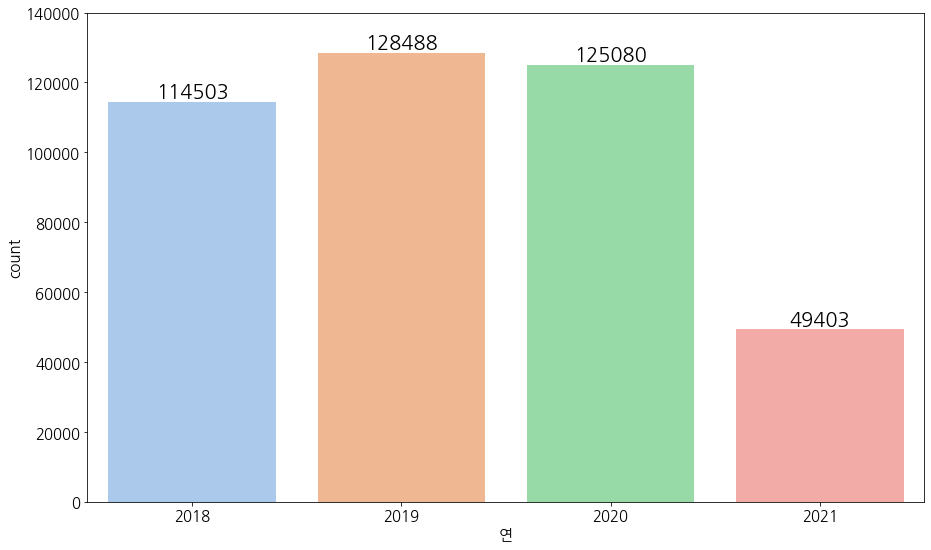

In [ ]:
sns.barplot(data=year_IN, x= '연', y='count', palette='pastel')
plt.ylim(0,140000)

for i in range(len(year_IN)):
#     print(year_IN.iloc[i,1])
    plt.text(i, year_IN.iloc[i,1], year_IN.iloc[i,1],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 20, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

In [ ]:
year_OUT = df_feat6[df_feat6['입양여부2']==1]
year_OUT = year_OUT.groupby('연').agg({'품종':['count']})
year_OUT.columns = ['count']
year_OUT = year_OUT.reset_index()
year_OUT

,연,count
0,2018,53938
1,2019,56266
2,2020,57011
3,2021,22440


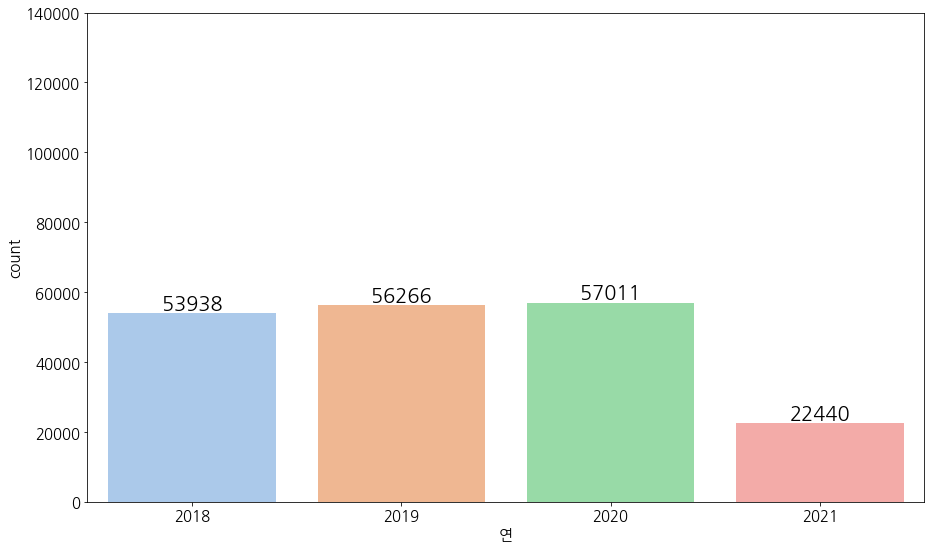

In [ ]:
sns.barplot(data=year_OUT, x= '연', y='count', palette='pastel')
plt.ylim(0,140000)

for i in range(len(year_IN)):
#     print(year_OUT.iloc[i,1])
    plt.text(i, year_OUT.iloc[i,1], year_OUT.iloc[i,1],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 20, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 

### 8. 특징(성격,건강,나이) 에 따른 입양 

#### 1. 반환이 포함되지 않은 경우

In [ ]:
out_arr = ['종료(입양)','종료(기증)','종료(반환)']
# out_arr = ['종료(입양)','종료(기증)'] # 반환 여부에 따라 나이에 따른 입양률이 달라짐
feat_df = df[['성격','건강','나이','상태']]
def divide_status(df):
  arr = []
  for t in df['상태']:
    if t in out_arr:
      arr.append(1)
    else:
      arr.append(0)
  return arr
# 입양에 해당 하는 부분은 1로 아닌 것은 0으로 하는 컬럼 추가
feat_df['입양여부'] = divide_status(df)
feat_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,성격,건강,나이,상태,입양여부
0,0,2,0,종료(안락사),0
1,0,0,0,종료(입양),1
2,0,0,0,종료(자연사),0
3,0,2,0,종료(안락사),0
4,0,2,0,종료(반환),1
...,...,...,...,...,...
421756,0,0,1,공고중,0
421757,1,2,0,공고중,0
421758,0,0,1,공고중,0
421759,0,0,1,공고중,0


<Figure size 720x1800 with 0 Axes>

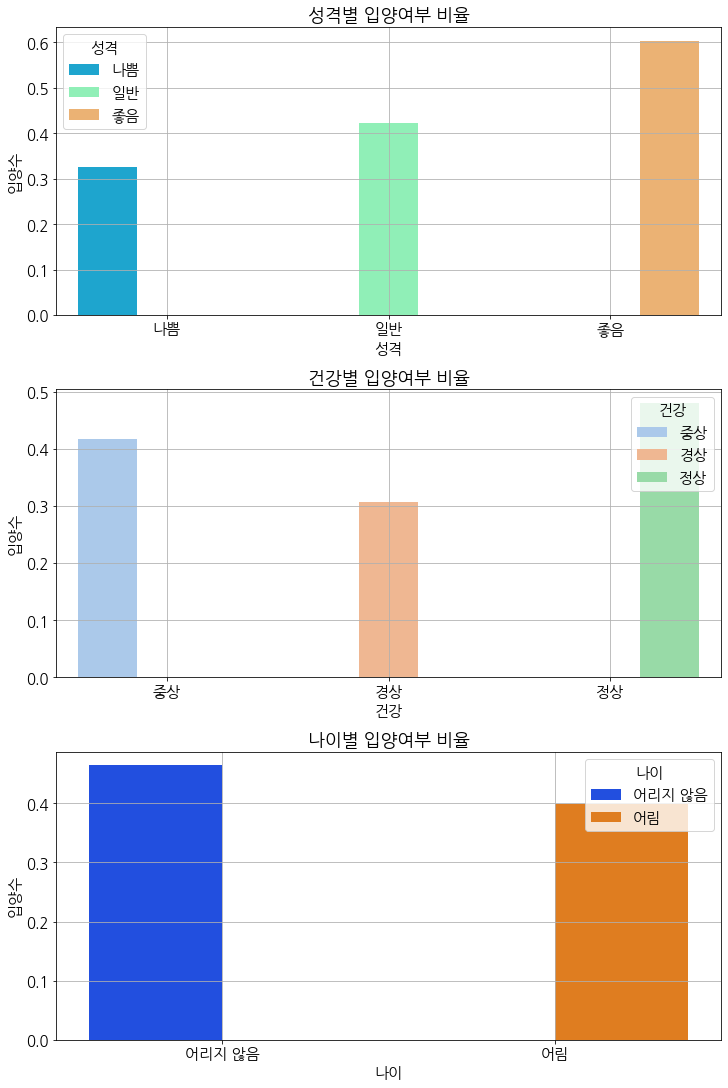

In [ ]:
plt.figure(figsize=(10,25))

fig,ax = plt.subplots(3,1,figsize=(10,15),constrained_layout=True)

# 성격별 입양여부

all_df = feat_df.groupby('성격').agg({'입양여부':['count']})
all_df.columns=['count']
temp_df = feat_df.groupby('성격').agg({'입양여부':['sum']})
temp_df.columns=['count']
character_df = temp_df/all_df
character_df = character_df.rename(index={0:'일반',1:'나쁨',2:'좋음'}).reindex(['나쁨','일반','좋음']).reset_index(level=0)
character_df
bars = sns.barplot(data=character_df,x='성격',y='count',hue='성격',ax=ax[0],palette='rainbow')
bars.set_ylabel('입양수')
bars.grid(True)
bars.set_title('성격별 입양여부 비율')

# ax[0].legend(['일반','나쁨','좋음'],labels=['일반','나쁨','좋음'])

# 건강별 입양여부
all_df = feat_df.groupby('건강').agg({'입양여부':['count']})
all_df.columns=['count']
temp_df = feat_df.groupby('건강').agg({'입양여부':['sum']})
temp_df.columns=['count']
health_df = temp_df/all_df
health_df = health_df.rename(index={0:'정상',1:'경상',2:'중상'}).reindex(['중상','경상','정상']).reset_index(level=0)
sns.barplot(data=health_df,x='건강',y=('count'),hue='건강',ax=ax[1],palette='pastel')
ax[1].set_ylabel('입양수')
ax[1].grid(True)
ax[1].set_title('건강별 입양여부 비율')

# 나이별 입양여부
all_df = feat_df.groupby('나이').agg({'입양여부':['count']})
all_df.columns=['count']
temp_df = feat_df.groupby('나이').agg({'입양여부':['sum']})
temp_df.columns=['count']
age_df = temp_df/all_df
age_df = age_df.rename(index={0:'어리지 않음',1:'어림'}).reset_index(level=0)
sns.barplot(data=age_df,x='나이',y=('count'),hue='나이',ax=ax[2],palette='bright')
ax[2].set_ylabel('입양수')
ax[2].grid(True)
ax[2].set_title('나이별 입양여부 비율')
plt.show()

In [ ]:
feat_df['성격'] = feat_df['성격'].apply(lambda x : '일반' if x==0 else '나쁨' if x==1 else '좋음')
feat_df['건강'] = feat_df['건강'].apply(lambda x : '정상' if x==0 else '경상' if x==1 else '중상')
feat_df['나이'] = feat_df['나이'].apply(lambda x : '어리지 않음' if x==0 else '어림')
feat_df['입양여부'] = feat_df['입양여부'].apply(lambda x : '입양하지 않음' if x==0 else '입양')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

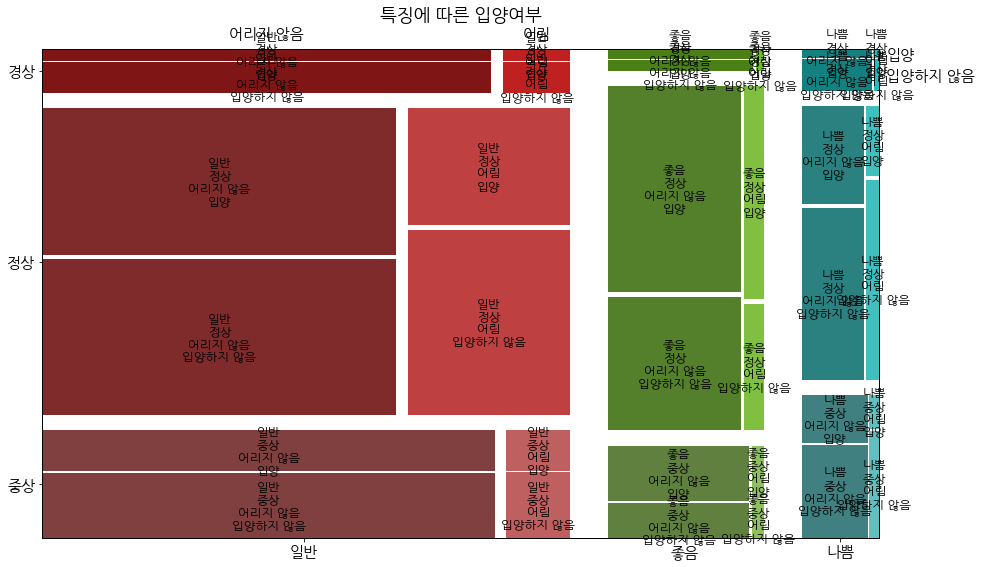

In [ ]:
mosaic(feat_df, ['성격','건강','나이','입양여부'], 
 title='특징에 따른 입양여부',gap=0.05)
plt.show()


#### 2. 반환이 포함된 경우


In [ ]:
out_arr = ['종료(입양)','종료(기증)','종료(반환)']
# out_arr = ['종료(입양)','종료(기증)'] # 반환 여부에 따라 나이에 따른 입양률이 달라짐
feat_df = df[['성격','건강','나이','상태']]
def divide_status(df):
  arr = []
  for t in df['상태']:
    if t in out_arr:
      arr.append(1)
    else:
      arr.append(0)
  return arr
# 입양에 해당 하는 부분은 1로 아닌 것은 0으로 하는 컬럼 추가
feat_df['입양여부'] = divide_status(df)
feat_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,성격,건강,나이,상태,입양여부
0,0,2,0,종료(안락사),0
1,0,0,0,종료(입양),1
2,0,0,0,종료(자연사),0
3,0,2,0,종료(안락사),0
4,0,2,0,종료(반환),1
...,...,...,...,...,...
421756,0,0,1,공고중,0
421757,1,2,0,공고중,0
421758,0,0,1,공고중,0
421759,0,0,1,공고중,0


<Figure size 720x1800 with 0 Axes>

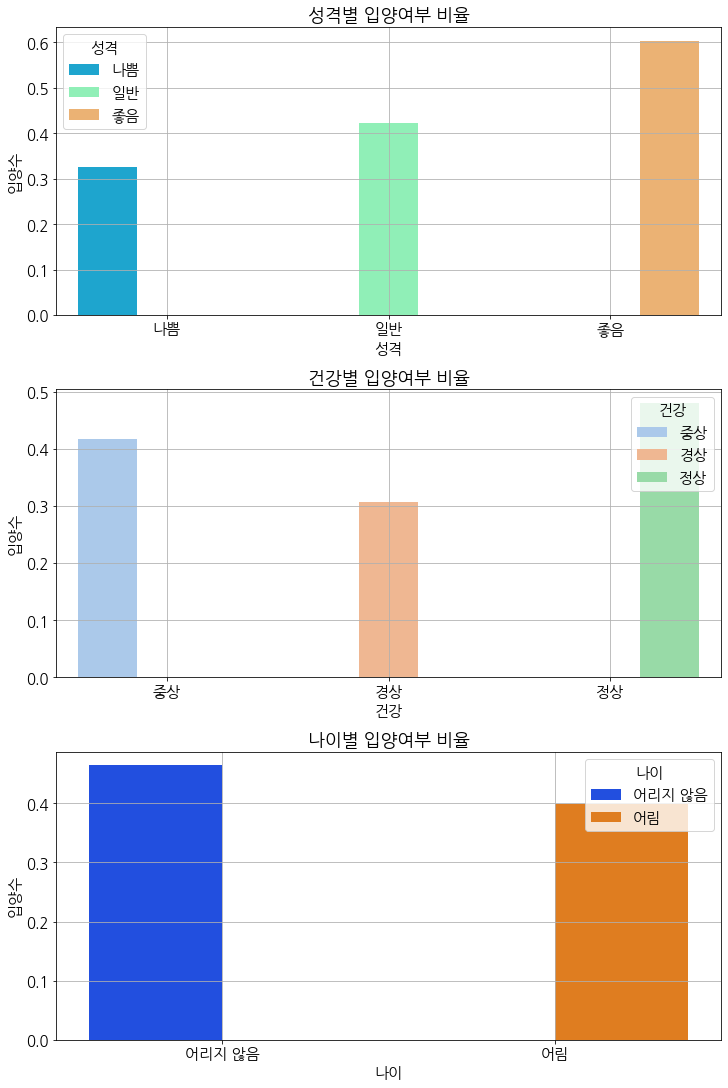

In [ ]:
plt.figure(figsize=(10,25))

fig,ax = plt.subplots(3,1,figsize=(10,15),constrained_layout=True)

# 성격별 입양여부

all_df = feat_df.groupby('성격').agg({'입양여부':['count']})
all_df.columns=['count']
temp_df = feat_df.groupby('성격').agg({'입양여부':['sum']})
temp_df.columns=['count']
character_df = temp_df/all_df
character_df = character_df.rename(index={0:'일반',1:'나쁨',2:'좋음'}).reindex(['나쁨','일반','좋음']).reset_index(level=0)
character_df
bars = sns.barplot(data=character_df,x='성격',y='count',hue='성격',ax=ax[0],palette='rainbow')
bars.set_ylabel('입양수')
bars.grid(True)
bars.set_title('성격별 입양여부 비율')

# ax[0].legend(['일반','나쁨','좋음'],labels=['일반','나쁨','좋음'])

# 건강별 입양여부
all_df = feat_df.groupby('건강').agg({'입양여부':['count']})
all_df.columns=['count']
temp_df = feat_df.groupby('건강').agg({'입양여부':['sum']})
temp_df.columns=['count']
health_df = temp_df/all_df
health_df = health_df.rename(index={0:'정상',1:'경상',2:'중상'}).reindex(['중상','경상','정상']).reset_index(level=0)
sns.barplot(data=health_df,x='건강',y=('count'),hue='건강',ax=ax[1],palette='pastel')
ax[1].set_ylabel('입양수')
ax[1].grid(True)
ax[1].set_title('건강별 입양여부 비율')

# 나이별 입양여부
all_df = feat_df.groupby('나이').agg({'입양여부':['count']})
all_df.columns=['count']
temp_df = feat_df.groupby('나이').agg({'입양여부':['sum']})
temp_df.columns=['count']
age_df = temp_df/all_df
age_df = age_df.rename(index={0:'어리지 않음',1:'어림'}).reset_index(level=0)
sns.barplot(data=age_df,x='나이',y=('count'),hue='나이',ax=ax[2],palette='bright')
ax[2].set_ylabel('입양수')
ax[2].grid(True)
ax[2].set_title('나이별 입양여부 비율')
plt.show()

In [ ]:
feat_df['성격'] = feat_df['성격'].apply(lambda x : '일반' if x==0 else '나쁨' if x==1 else '좋음')
feat_df['건강'] = feat_df['건강'].apply(lambda x : '정상' if x==0 else '경상' if x==1 else '중상')
feat_df['나이'] = feat_df['나이'].apply(lambda x : '어리지 않음' if x==0 else '어림')
feat_df['입양여부'] = feat_df['입양여부'].apply(lambda x : '입양하지 않음' if x==0 else '입양')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

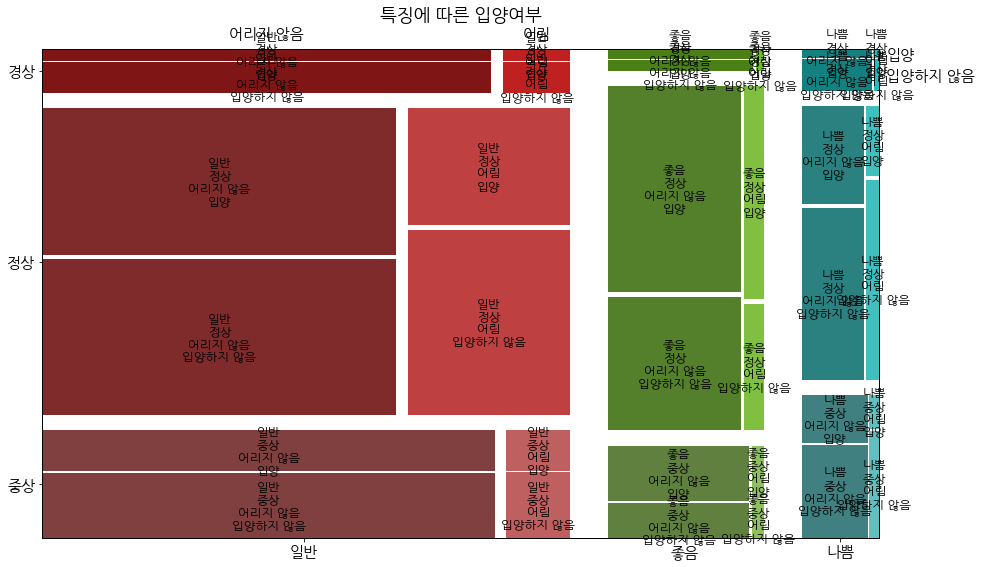

In [ ]:
mosaic(feat_df, ['성격','건강','나이','입양여부'], 
 title='특징에 따른 입양여부',gap=0.05)
plt.show()

## 9. 공고기간별 입양 분석
(반환도 포함되어 있음)

In [ ]:
feat_df['공고기간'] = df['공고기간']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
feat_df

,성격,건강,나이,상태,입양여부,공고기간
0,일반,중상,어리지 않음,종료(안락사),입양하지 않음,10
1,일반,정상,어리지 않음,종료(입양),입양,10
2,일반,정상,어리지 않음,종료(자연사),입양하지 않음,10
3,일반,중상,어리지 않음,종료(안락사),입양하지 않음,7
4,일반,중상,어리지 않음,종료(반환),입양,10
...,...,...,...,...,...,...
421756,일반,정상,어림,공고중,입양하지 않음,11
421757,나쁨,중상,어리지 않음,공고중,입양하지 않음,11
421758,일반,정상,어림,공고중,입양하지 않음,12
421759,일반,정상,어림,공고중,입양하지 않음,11


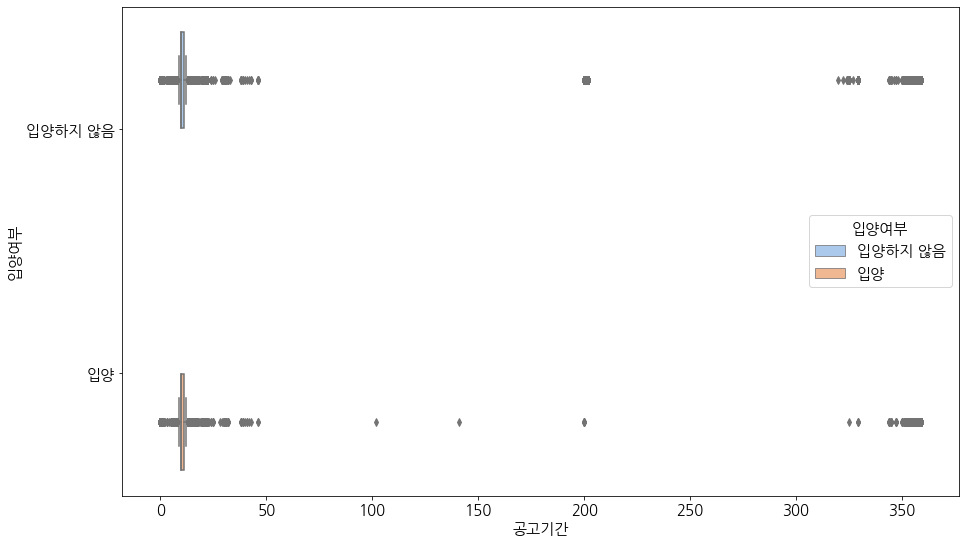

In [ ]:
sns.boxplot(data=feat_df,x='공고기간',y='입양여부',palette='pastel',hue='입양여부')
# 기간이 길다고 무조건 입양에 좋은 영향을 준다고 볼 수는 없을 것 같다.

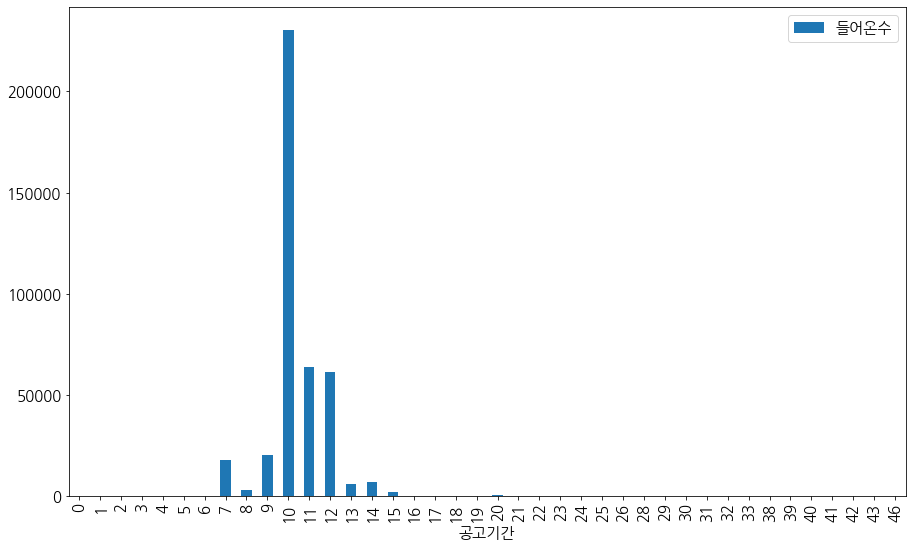

In [ ]:
# 공고 기간 50일 이내로 분포 분석
period_df = feat_df[feat_df['공고기간']<50].groupby('공고기간').agg({'입양여부':['sum','count']})
# period_df = period_df.reset_index()
period_df.columns = ['입양수','들어온수']
period_df.plot(kind='bar')
# fig,ax = plt.subplots(111)
# sns.barplot(data = period_df,x='공고기간',y,ax=ax)


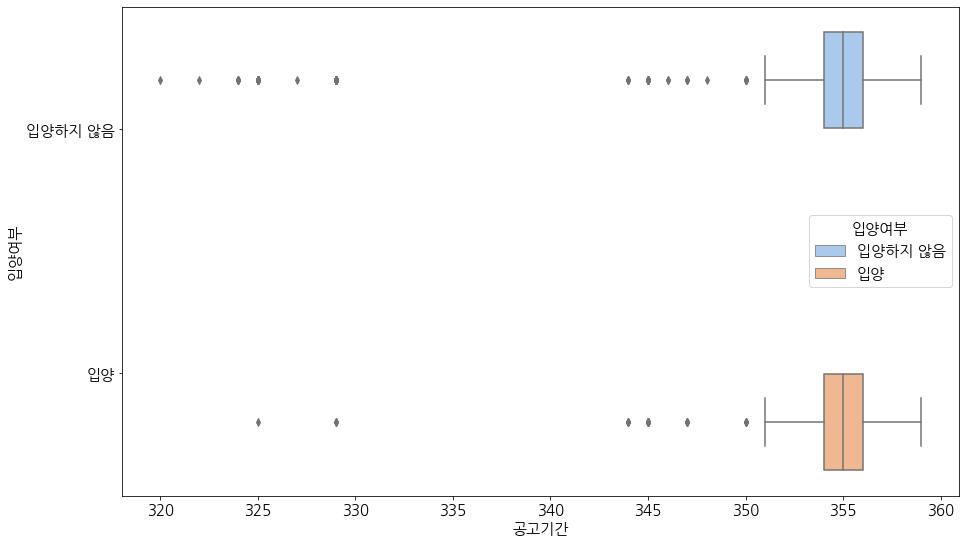

In [ ]:
# 유독 300이 넘는 공고기간도 있는데 300일 넘는 경우에는 어떤 영향이 있나 보자
sns.boxplot(data=feat_df[feat_df['공고기간']>300],x='공고기간',y='입양여부',palette='pastel',hue='입양여부')
# 300일이 넘어도 입양여부에는 크게 다른 분포가 존재 하지 않음 -> 공고기간의 영향력은 없다고 봄

## 10. 지역별 In/Out 개체 수 비교

In [ ]:
import folium
from folium import plugins

In [ ]:
# 수지님 데이터 불러오는 부분
df_feat6 = '/content/drive/MyDrive/AniHelp_feat6.csv'
df_feat6 = pd.read_csv(df_feat6, index_col=0)
df_feat6 = df_feat6.drop('Unnamed: 0', axis=1)

KeyError: ignored

In [ ]:
# 수지님 데이터 불러오는 부분
df_feat6 = '/content/drive/MyDrive/TwoPs/AniHelp_feat7.csv'
df_feat6 = pd.read_csv(df_feat6, index_col=0)
df_feat6
df_feat6 = df_feat6.drop('index', axis=1)

In [ ]:
# 전체기간 동안 보호소 In
df_address = df_feat6[['위도','경도']].dropna()
map_in = folium.Map([36.4, 128], zoom_start=6.5)
plugins.MousePosition().add_to(map_in) 
plugins.MarkerCluster(df_address).add_to(map_in)
map_in

RecursionError: ignored

In [ ]:
# 전체기간 동안 입양 ㄱㄱ
df_address_out = df_feat6[df_feat6['입양여부2']==1][['위도','경도']].dropna()
map_out = folium.Map([36.4, 128], zoom_start=6.5)
plugins.MousePosition().add_to(map_out) 
plugins.MarkerCluster(df_address_out).add_to(map_out)
map_out

NameError: ignored

In [ ]:
# 위 두 가지 Dual Map 으로 비교

m = folium.plugins.DualMap(location=(36.4, 128), tiles='openstreetmap',layout='horizontal', zoom_start=6.6) 

# map_in = folium.Map([36.4, 128], zoom_start=6.5)
plugins.MousePosition().add_to(m.m1) 
plugins.MarkerCluster(df_address).add_to(m.m1)
# map_in.add_to(m.m1)


# map_out = folium.Map([36.4, 128], zoom_start=6.5)
plugins.MousePosition().add_to(m.m2) 
plugins.MarkerCluster(df_address_out).add_to(m.m2)
# map_out.add_to(m.m2)

folium.LayerControl(collapsed=False).add_to(m)
m

# html 로 정희씨 드림 '-')
# 이거 발표 때 웹에서 그대로 소환해서 보여주는걸로 ㄱㄱ

In [ ]:
m.save('m_in-out.html')

In [ ]:
df_feat6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418658 entries, 0 to 418657
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   index      418658 non-null  int64  
 1   공고번호       418658 non-null  object 
 2   축종         418658 non-null  object 
 3   품종         417474 non-null  object 
 4   털색         418654 non-null  object 
 5   성별         418658 non-null  object 
 6   중성화여부      418658 non-null  object 
 7   특징         418613 non-null  object 
 8   접수일시       418658 non-null  object 
 9   구조사유       75842 non-null   object 
 10  발생장소       418658 non-null  object 
 11  공고기간       418658 non-null  int64  
 12  관할보호센터명    418657 non-null  object 
 13  보호장소       418657 non-null  object 
 14  관할기관       418658 non-null  object 
 15  상태         418658 non-null  object 
 16  gender     418658 non-null  int64  
 17  neutering  418658 non-null  int64  
 18  털색2        418658 non-null  object 
 19  품종2        418658 non-n

In [ ]:
# 수지님 데이터 불러오는 부분
sj_path = '/content/drive/MyDrive/AniHelp_feat7.csv'
df_feat7 = pd.read_csv(sj_path, index_col=0)
df_feat7.head()

,index,공고번호,축종,품종,털색,성별,중성화여부,특징,접수일시,구조사유,발생장소,공고기간,관할보호센터명,보호장소,관할기관,상태,gender,neutering,털색2,품종2,지역,성격,건강,나이,입양여부,입양여부2,월,도,시,위도,경도,연,연월,사이즈
0,0,광주-남구-2018-00001,개,믹스견,흰색,수컷,미상,"18-0002콩지,다리부상",2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(안락사),1,2,흰색,믹스견,광주 남구,0,2,0,0,0,1,광주,남구,35.222932,126.881636,2018,2018-01,중형
1,1,광주-남구-2018-00002,개,믹스견,흰색,암컷,미상,18-0003콩이,2018-01-01,NaN,남구 송하동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(입양),0,2,흰색,믹스견,광주 남구,0,0,0,1,1,1,광주,남구,35.222932,126.881636,2018,2018-01,중형
2,2,광주-광산-2018-00001,개,보스턴 테리어,검흰,수컷,아니오,"18-0001볼타,스파이크 목줄착용",2018-01-01,NaN,광산구 하남동,10,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 광산구,종료(자연사),1,1,unknown,품종견,광주 광산,0,0,0,0,0,1,광주,광산,35.222932,126.881636,2018,2018-01,소형
3,3,경기-수원-2018-00001,개,믹스견,갈색,암컷,아니오,"교통사고 = 골반 / 척추 분리 골절 , 대퇴골두 골절 = 진통제 처치",2018-01-01,NaN,세류사거리,7,광교산동물병원,경기도 수원시 장안구 영화동 127-39,경기도 수원시,종료(안락사),0,1,갈색,믹스견,경기 수원,0,2,0,0,0,1,경기,수원,37.290757,127.016914,2018,2018-01,중형
4,4,경기-성남-2018-00001,개,푸들,흑색,수컷,아니오,연두색옷착용.귀염증,2018-01-01,유기견발견후 신고,중원도서관근처,10,펫토피아동물병원,"경기도 성남시 분당구 불정로 266 (수내동, 유신제일조합)",경기도 성남시,종료(반환),1,1,검정색,품종견,경기 성남,0,2,0,1,1,1,경기,성남,37.367098,127.127694,2018,2018-01,중형


In [ ]:
# 사이즈별 도별 입소 동물 수
size_in1 = df_feat7.groupby(['사이즈','도']).agg({'시':['count']})
size_in1.columns=['사이즈']
size_in1 = size_in1.reindex(['대형','중형','소형','미상'], level=0)
size_in1 = size_in1.unstack(level=0)
size_in1.fillna(0, inplace=True)
size_in1 = size_in1.astype(int)
# size_in1 = size_in1[['대형','중형','소형','미상']]
size_in1.columns = ['대형','중형','소형','미상']
size_in1

,대형,중형,소형,미상
도,,,,
강원,974,12804,5267,11
경기,4075,53685,31619,60
경남,1173,35824,7164,202
경북,1068,22348,5384,18
광주,269,4609,7064,1
대구,384,6066,10185,14
대전,360,3218,5590,4
부산,504,9621,14004,1132
서울,476,9007,13347,12


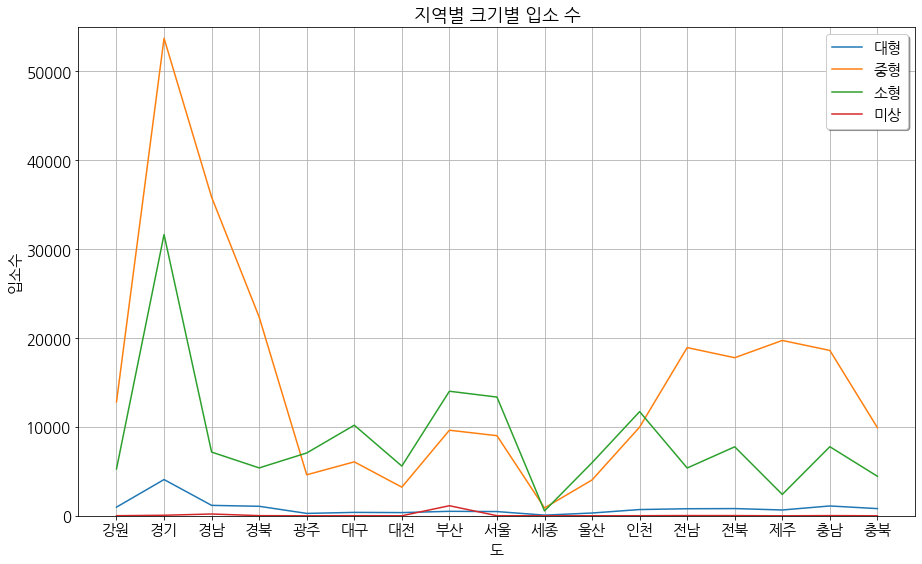

In [ ]:
fig,ax = plt.subplots(1,1)
sns.lineplot(data=size_in1, x='도', y='대형', ax=ax, label = '대형') # , hue='축종',palette=sns.palettes.color_palette('pastel',2)
sns.lineplot(data=size_in1, x='도', y='중형', ax=ax, label = '중형')
sns.lineplot(data=size_in1, x='도', y='소형', ax=ax, label = '소형')
sns.lineplot(data=size_in1, x='도', y='미상', ax=ax, label = '미상')
ax.set_xticklabels(['강원', '경기', '경남', '경북', '광주',
                    '대구','대전','부산','서울','세종',
                    '울산','인천','전남','전북','제주',
                    '충남','충북'])
ax.set_ylabel('입소수')
ax.grid(True)
plt.legend(loc = 'upper right', frameon=True, shadow=True)
plt.title('지역별 크기별 입소 수')
plt.ylim(0,55000)
plt.show()

In [ ]:
# 사이즈별 도별 입양 수
size_out1 = df_feat7[df_feat7['입양여부2']==1][['사이즈','도','시']]
size_out1 = size_out1.groupby(['사이즈','도']).agg({'시':['count']})
size_out1.columns=['사이즈']
size_out1 = size_out1.reindex(['대형','중형','소형','미상'], level=0)
size_out1 = size_out1.unstack(level=0)
size_out1.fillna(0, inplace=True)
size_out1 = size_out1.astype(int)
size_out1.columns = ['대형','중형','소형','미상']
size_out1

,대형,중형,소형,미상
도,,,,
강원,821,5942,2627,5
경기,3430,25028,17790,32
경남,970,11340,4081,74
경북,878,9138,3161,4
광주,238,2463,2153,1
대구,329,3356,4608,7
대전,327,1815,1820,1
부산,398,3633,3722,269
서울,435,5860,7639,8


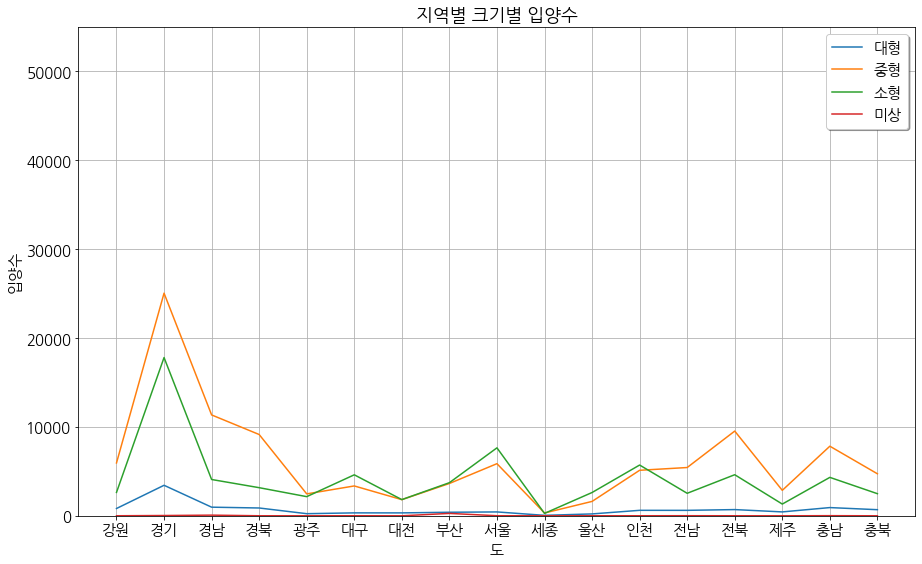

In [ ]:
fig,ax = plt.subplots(1,1)
sns.lineplot(data=size_out1, x='도', y='대형', ax=ax, label = '대형') # , hue='축종',palette=sns.palettes.color_palette('pastel',2)
sns.lineplot(data=size_out1, x='도', y='중형', ax=ax, label = '중형')
sns.lineplot(data=size_out1, x='도', y='소형', ax=ax, label = '소형')
sns.lineplot(data=size_out1, x='도', y='미상', ax=ax, label = '미상')
ax.set_xticklabels(['강원', '경기', '경남', '경북', '광주',
                    '대구','대전','부산','서울','세종',
                    '울산','인천','전남','전북','제주',
                    '충남','충북'])
ax.set_ylabel('입양수')
ax.grid(True)
plt.legend(loc = 'upper right', frameon=True, shadow=True)
plt.title('지역별 크기별 입양수')
plt.ylim(0,55000)
plt.show()

### 밑의 것은 건드리지 말 것 '-')/

# 학습용 데이터 생성

In [ ]:
locadd_df = pd.read_csv('/content/drive/MyDrive/TwoPs/AniHelp_loc_added.csv', index_col=0)
locadd_df

,공고번호,축종,품종,털색,성별,중성화여부,특징,접수일시,구조사유,발생장소,공고기간,관할보호센터명,보호장소,관할기관,상태,gender,neutering,털색2,품종2,지역,성격,건강,나이,위도,경도
0,광주-남구-2018-00001,개,믹스견,흰색,수컷,미상,"18-0002콩지,다리부상",2018-01-01,NaN,남구 송하동,10.0,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(안락사),1.0,2.0,흰색,믹스견,광주 남구,0.0,2.0,0.0,35.222932,126.881636
1,광주-남구-2018-00002,개,믹스견,흰색,암컷,미상,18-0003콩이,2018-01-01,NaN,남구 송하동,10.0,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 남구,종료(입양),0.0,2.0,흰색,믹스견,광주 남구,0.0,0.0,0.0,35.222932,126.881636
2,광주-광산-2018-00001,개,보스턴 테리어,검흰,수컷,아니오,"18-0001볼타,스파이크 목줄착용",2018-01-01,NaN,광산구 하남동,10.0,광주 동물보호소,"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주광역시 광산구,종료(자연사),1.0,2.0,unknown,품종견,광주 광산,0.0,0.0,0.0,35.222932,126.881636
3,경기-수원-2018-00001,개,믹스견,갈색,암컷,아니오,"교통사고 = 골반 / 척추 분리 골절 , 대퇴골두 골절 = 진통제 처치",2018-01-01,NaN,세류사거리,7.0,광교산동물병원,경기도 수원시 장안구 영화동 127-39,경기도 수원시,종료(안락사),0.0,2.0,갈색,믹스견,경기 수원,0.0,2.0,0.0,37.290757,127.016914
4,경기-성남-2018-00001,개,푸들,흑색,수컷,아니오,연두색옷착용.귀염증,2018-01-01,유기견발견후 신고,중원도서관근처,10.0,펫토피아동물병원,"경기도 성남시 분당구 불정로 266 (수내동, 유신제일조합)",경기도 성남시,종료(반환),1.0,2.0,검정색,품종견,경기 성남,0.0,2.0,0.0,37.367098,127.127694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421756,제주-제주-2021-02431,고양이,한국 고양이,흰/검,수컷,예,(개체관리번호21335)두부교상,2021-06-23,NaN,제주시 이도일동 중앙로25길22-1,11.0,제주 동물보호센터,제주특별자치도 제주시 첨단동길 184-14 (용강동),제주특별자치도,공고중,1.0,0.0,unknown,한국 고양이,제주 제주,0.0,0.0,1.0,37.870098,126.983546
421757,서울-성동-2021-00073,개,믹스견,검/흰,수컷,아니오,양귀처짐. 코검정. 배빵빵함. 소심함. 꼬리단미안됨. 털상태양호.,2021-06-23,NaN,행당동 168-151 왕십리역 인근,11.0,한국동물구조관리협회,경기도 양주시 남면 감악산로 63-37 (남면),서울특별시 성동구,공고중,1.0,2.0,unknown,믹스견,서울 성동,1.0,2.0,0.0,34.987903,127.576526
421758,전남-광양-2021-00251,개,믹스견,갈색+검정,암컷,아니오,믹스 갈색+검정 암컷 3개월추정,2021-06-23,유기동물,은장도길35-7 주변,12.0,광양시 임시보호소,전라남도 광양시 봉강면 인덕로 1169-20 (봉강면) 지곡리 864-24,전라남도 광양시,공고중,0.0,2.0,갈색 검정색,믹스견,전남 광양,0.0,0.0,1.0,33.455499,126.589153
421759,제주-제주-2021-02423,고양이,한국 고양이,검정,수컷,아니오,(개체관리번호21327)생후2개월,2021-06-23,NaN,서귀포시 남원읍 위미해안로129번길31-4,11.0,제주 동물보호센터,제주특별자치도 제주시 첨단동길 184-14 (용강동),제주특별자치도,공고중,1.0,2.0,검정색,한국 고양이,제주 제주,0.0,0.0,1.0,37.870098,126.983546


In [ ]:
df.columns

Index(['공고번호', '축종', '품종', '털색', '성별', '중성화여부', '특징', '접수일시', '구조사유', '발생장소',
       '공고기간', '관할보호센터명', '보호장소', '관할기관', '상태', 'gender', 'neutering', '털색2',
       '품종2', '지역', '성격', '건강', '나이'],
      dtype='object')

In [ ]:
len(df['관할기관'])

421761

In [ ]:
out_arr = ['종료(입양)','종료(기증)','종료(반환)']
df['입양여부'] = divide_status(df)
df['위도'] = locadd_df['위도']
df['경도'] = locadd_df['경도']
dataset_df = df[['축종', '접수일시', '공고기간', '관할기관', '지역', '상태', 'gender', 'neutering', '털색2',
       '품종2', '성격', '건강', '나이','위도','경도','입양여부']]
dataset_df       

,축종,접수일시,공고기간,관할기관,상태,gender,neutering,털색2,품종2,지역,성격,건강,나이,위도,경도,입양여부
0,개,2018-01-01,10,광주광역시 남구,종료(안락사),1,2,흰색,믹스견,광주 남구,0,2,0,35.222932,126.881636,0
1,개,2018-01-01,10,광주광역시 남구,종료(입양),0,2,흰색,믹스견,광주 남구,0,0,0,35.222932,126.881636,1
2,개,2018-01-01,10,광주광역시 광산구,종료(자연사),1,2,unknown,품종견,광주 광산,0,0,0,35.222932,126.881636,0
3,개,2018-01-01,7,경기도 수원시,종료(안락사),0,2,갈색,믹스견,경기 수원,0,2,0,37.290757,127.016914,0
4,개,2018-01-01,10,경기도 성남시,종료(반환),1,2,검정색,품종견,경기 성남,0,2,0,37.367098,127.127694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421756,고양이,2021-06-23,11,제주특별자치도,공고중,1,0,unknown,한국 고양이,제주 제주,0,0,1,37.870098,126.983546,0
421757,개,2021-06-23,11,서울특별시 성동구,공고중,1,2,unknown,믹스견,서울 성동,1,2,0,34.987903,127.576526,0
421758,개,2021-06-23,12,전라남도 광양시,공고중,0,2,갈색 검정색,믹스견,전남 광양,0,0,1,33.455499,126.589153,0
421759,고양이,2021-06-23,11,제주특별자치도,공고중,1,2,검정색,한국 고양이,제주 제주,0,0,1,37.870098,126.983546,0


In [ ]:
dataset_df.to_csv('/content/drive/MyDrive/TwoPs/AniHelp_train.csv')